# Getting to know interface objects

In [97]:
# auto update source files before running cells
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [98]:

import logging
# setup logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)
logger.info("Logging is set up.")

INFO:__main__:Logging is set up.


## Cmip6MeteorDataGetter


In [99]:
from meteor import Cmip6MeteorDataGetter
# write out docstring of Cmip6MeteorDataGetter
print(Cmip6MeteorDataGetter.__init__.__doc__)


Initialise data getter object

Parameters
----------
models : list
    List of models to include. If nothing is sent the object will
    include all models that have data for the full combination of
    fields and experiments
flds : list
    Of variable fields to include (monthly data)
    If nothing is sent for this it will be set to
    ['tas', 'pr']
tabids : list[str], optional
    List of table_id names to use for each field.
    This should be the same length as flds, and have values
    corresponding to each field in the same order.
    If nothing is sent for this it will be set to a list of all
    entries equal to 'Amon' with the same length as flds.
exps : list
    Of experiments to include. If nothing is sent for
    this it will be set to ['piControl', 'abrupt4xCO2']
dbe : list
    Of CMIP6 project names for each of the experiments. This should be
    the same length as exps, and have values corresponding to each
    experiment in the same order. If nothing is set, it will 

In [100]:
data_getter_pulse_response_training = Cmip6MeteorDataGetter(
    flds=['tos', 'tas', 'pr'],
    tabids=['Omon', 'Amon', 'Amon'],
    exps=['piControl', 'abrupt-4xCO2', 'ssp245'],
    dbe=['CMIP', 'CMIP', 'ScenarioMIP'],
    cache_dir='../cache',
    enable_cache=True,
    enable_compression=True,
    compression_level=6, # from 0 (no compression) to 9 (max compression), 6 is recommended balance
)
data_getter_pulse_response_prediction = Cmip6MeteorDataGetter(
    flds=['tos', 'tas', 'pr'],
    tabids=['Omon', 'Amon', 'Amon'],
    exps=['historical', 'ssp126', 'ssp245', 'ssp370'],
    dbe=['CMIP', 'ScenarioMIP', 'ScenarioMIP', 'ScenarioMIP', 'ScenarioMIP'],
    cache_dir='../cache',
    enable_cache=True,
    enable_compression=True,
    compression_level=6
)

INFO:root:Cache tree structure set up.
INFO:root:Loading CMIP6 catalog from cache: ../cache/cmip6/cmip6-zarr-consolidated-stores.csv


INFO:root:Excluded 28 models due to incomplete data:
  - ACCESS-ESM1-5: missing tos@ssp245
  - AWI-ESM-1-1-LR: missing tos@abrupt-4xCO2, tas@abrupt-4xCO2, pr@abrupt-4xCO2, tos@ssp245, tas@ssp245, pr@ssp245
  - BCC-ESM1: missing tos@ssp245, tas@ssp245, pr@ssp245
  - CESM2-FV2: missing tos@ssp245, tas@ssp245, pr@ssp245
  - CESM2-WACCM-FV2: missing tos@ssp245, tas@ssp245, pr@ssp245
  - CNRM-CM6-1-HR: missing tos@abrupt-4xCO2
  - CanESM5-CanOE: missing tos@abrupt-4xCO2, tas@abrupt-4xCO2, pr@abrupt-4xCO2
  - E3SM-1-0: missing tos@ssp245, tas@ssp245, pr@ssp245
  - E3SM-1-1: missing tos@abrupt-4xCO2, tas@abrupt-4xCO2, pr@abrupt-4xCO2, tos@ssp245
  - E3SM-1-1-ECA: missing tos@abrupt-4xCO2, tas@abrupt-4xCO2, pr@abrupt-4xCO2, tos@ssp245, tas@ssp245, pr@ssp245
  - EC-Earth3-AerChem: missing tos@ssp245, tas@ssp245, pr@ssp245
  - EC-Earth3-CC: missing pr@piControl, tos@abrupt-4xCO2
  - EC-Earth3-LR: missing tos@abrupt-4xCO2, tas@abrupt-4xCO2, pr@abrupt-4xCO2, tos@ssp245, tas@ssp245, pr@ssp245
  - E

In [101]:
intvar_variables = [
    'tos',  # ocean surface temperature
    'tas',  # near-surface air temperature
    'pr',   # precipitation
    'hfls',  # Surface Upward Latent Heat Flux
    'psl'    # sea level pressure
]
intvar_tabids_mon = ['Omon', 'Amon', 'Amon', 'Amon', 'Amon']
intvar_tabids_day = ['Oday', 'day', 'day', 'day', 'day']

intvar_exps_training = ['historical', 'ssp245']
intvar_dbe_training = ['CMIP', 'ScenarioMIP']
intvar_exps_prediction = ['historical', 'ssp126', 'ssp245', 'ssp370']
intvar_dbe_prediction = ['CMIP', 'ScenarioMIP', 'ScenarioMIP', 'ScenarioMIP', 'ScenarioMIP']

data_getter_intvar_training = Cmip6MeteorDataGetter(
    flds=intvar_variables,
    tabids=intvar_tabids_mon,
    exps=intvar_exps_training,
    dbe=intvar_dbe_training,
    cache_dir='/nird/datalake/NS9560K/johannef/FYS9429/cache',
    enable_cache=True,
    enable_compression=True,
    compression_level=6, # from 0 (no compression) to 9 (max compression), 6 is recommended balance
)
data_getter_intvar_prediction = Cmip6MeteorDataGetter(
    flds=intvar_variables,
    tabids=intvar_tabids_mon,
    exps=intvar_exps_prediction,
    dbe=intvar_dbe_prediction,
    cache_dir='/nird/datalake/NS9560K/johannef/FYS9429/cache',
    enable_cache=True,
    enable_compression=True,
    compression_level=6
)
data_getter_intvar_training_daily = Cmip6MeteorDataGetter(
    flds=intvar_variables,
    tabids=intvar_tabids_day,
    exps=intvar_exps_training,
    dbe=intvar_dbe_training,
    cache_dir='/nird/datalake/NS9560K/johannef/FYS9429/cache',
    enable_cache=True,
    enable_compression=True,
    compression_level=6, # from 0 (no compression) to 9 (max compression), 6 is recommended balance
)
data_getter_intvar_prediction_daily = Cmip6MeteorDataGetter(
    flds=intvar_variables,
    tabids=intvar_tabids_day,
    exps=intvar_exps_prediction,
    dbe=intvar_dbe_prediction,
    cache_dir='/nird/datalake/NS9560K/johannef/FYS9429/cache',
    enable_cache=True,
    enable_compression=True,
    compression_level=6
)

models_avail_for_intvar = list(
    set(data_getter_intvar_training.get_models_avail()) &
    set(data_getter_intvar_prediction.get_models_avail()) &
    set(data_getter_intvar_training_daily.get_models_avail()) &
    set(data_getter_intvar_prediction_daily.get_models_avail())
)
print("Available models for intvar training:", models_avail_for_intvar)

INFO:root:Cache tree structure set up.
INFO:root:Loading CMIP6 catalog from cache: /nird/datalake/NS9560K/johannef/FYS9429/cache/cmip6/cmip6-zarr-consolidated-stores.csv


INFO:root:Excluded 22 models due to incomplete data:
  - ACCESS-ESM1-5: missing tos@ssp245, hfls@ssp245, psl@ssp245
  - AWI-ESM-1-1-LR: missing tos@ssp245, tas@ssp245, pr@ssp245, hfls@ssp245, psl@ssp245
  - BCC-ESM1: missing tos@ssp245, tas@ssp245, pr@ssp245, hfls@ssp245, psl@ssp245
  - CAS-ESM2-0: missing hfls@ssp245
  - CESM2-FV2: missing tos@ssp245, tas@ssp245, pr@ssp245, hfls@ssp245, psl@ssp245
  - CESM2-WACCM-FV2: missing tos@ssp245, tas@ssp245, pr@ssp245, hfls@ssp245, psl@ssp245
  - CIESM: missing pr@historical
  - CMCC-CM2-HR4: missing tos@ssp245, tas@ssp245, pr@ssp245, hfls@ssp245, psl@ssp245
  - CMCC-ESM2: missing hfls@ssp245
  - E3SM-1-0: missing tos@ssp245, tas@ssp245, pr@ssp245, hfls@ssp245, psl@ssp245
  - E3SM-1-1: missing tos@ssp245, hfls@ssp245, psl@ssp245
  - E3SM-1-1-ECA: missing tos@ssp245, tas@ssp245, pr@ssp245, hfls@ssp245, psl@ssp245
  - EC-Earth3-AerChem: missing tos@ssp245, tas@ssp245, pr@ssp245, hfls@ssp245, psl@ssp245
  - EC-Earth3-CC: missing hfls@historical, 

Available models for intvar training: ['NorESM2-MM', 'ACCESS-CM2', 'BCC-CSM2-MR', 'IPSL-CM6A-LR', 'EC-Earth3', 'EC-Earth3-Veg', 'CESM2-WACCM', 'MPI-ESM1-2-HR', 'MPI-ESM1-2-LR', 'MRI-ESM2-0', 'UKESM1-0-LL', 'CESM2', 'CNRM-CM6-1', 'CanESM5', 'CNRM-ESM2-1']


In [102]:
data_getter_statics = Cmip6MeteorDataGetter(
    flds=['sftlf', 'sftof', 'sftgif', 'areacella', 'areacello', 'volcello'],
    tabids=['fx', 'Ofx', 'fx', 'fx', 'Ofx', 'Ofx'],
    exps=['ssp245'],
    cache_dir='../cache',
    enable_cache=True,
    enable_compression=True,
    compression_level=6, # from 0 (no compression) to 9 (max compression), 6 is recommended balance
)

INFO:root:Cache tree structure set up.
INFO:root:Loading CMIP6 catalog from cache: ../cache/cmip6/cmip6-zarr-consolidated-stores.csv


INFO:root:Excluded 16 models due to incomplete data:
  - AWI-CM-1-1-MR: missing sftof@ssp245, sftgif@ssp245, areacella@ssp245, volcello@ssp245
  - CMCC-CM2-SR5: missing sftof@ssp245
  - CanESM5: missing volcello@ssp245
  - CanESM5-CanOE: missing volcello@ssp245
  - EC-Earth3: missing sftgif@ssp245, volcello@ssp245
  - EC-Earth3-Veg: missing sftgif@ssp245, volcello@ssp245
  - FGOALS-g3: missing sftof@ssp245, sftgif@ssp245, areacella@ssp245
  - GFDL-CM4: missing sftof@ssp245, areacello@ssp245, volcello@ssp245
  - INM-CM4-8: missing sftof@ssp245, areacello@ssp245, volcello@ssp245
  - INM-CM5-0: missing sftof@ssp245, areacello@ssp245, volcello@ssp245
  - IPSL-CM6A-LR: missing sftof@ssp245, sftgif@ssp245, volcello@ssp245
  - MIROC-ES2L: missing volcello@ssp245
  - MIROC6: missing sftgif@ssp245, volcello@ssp245
  - MRI-ESM2-0: missing volcello@ssp245
  - NorESM2-MM: missing sftgif@ssp245
  - TaiESM1: missing sftof@ssp245, sftgif@ssp245, volcello@ssp245


## MeteorInterface

In [103]:
from meteor import MeteorInterface
print(MeteorInterface.__init__.__doc__)


Initialize MeteorInterface.

Parameters
----------
model : str
    CMIP6 model name
variables : str or list of str
    Climate variable(s) to emulate
cache_dir : str, optional
    Directory for caching models and data
data_getter_kwargs : dict, optional
    Additional arguments for Cmip6MeteorDataGetter



In [104]:
emulator = MeteorInterface(
    model='NorESM2-MM',
    variables=['psl'],
    data_getter_kwargs={
        'tabids': ['Amon']
    },
    cache_dir='/nird/datalake/NS9560K/johannef/FYS9429/cache'
)

INFO:root:Cache tree structure set up.
INFO:root:Loading CMIP6 catalog from cache: /nird/datalake/NS9560K/johannef/FYS9429/cache/cmip6/cmip6-zarr-consolidated-stores.csv


In [105]:
emulator.train(
    auto=True,
    verbose=True
)

Training METEOR emulator for NorESM2-MM
Variables: psl

🔧 Training PSL...
   → Training pattern scaling model...


INFO:root:Loading data from cache: NorESM2-MM_piControl_psl_yearly.nc
INFO:root:✓ Using cached yearly data for NorESM2-MM/piControl/psl
INFO:root:Loading data from cache: NorESM2-MM_abrupt-4xCO2_psl_yearly.nc
INFO:root:✓ Using cached yearly data for NorESM2-MM/abrupt-4xCO2/psl
INFO:root:Loading data from cache: NorESM2-MM_historical_psl_yearly.nc
INFO:root:✓ Using cached yearly data for NorESM2-MM/historical/psl
INFO:root:Loading data from cache: NorESM2-MM_ssp245_psl_yearly.nc
INFO:root:✓ Using cached yearly data for NorESM2-MM/ssp245/psl


      ⚠️  Cache miss: Model name mismatch: expected 'cmip6-NorESM2-MM-aer', found 'cmip6-NorESM2-MM-aer-psl'
🔧 Preparing pattern scaling training data for NorESM2-MM...


INFO:ciceroscm._utils:Parameter nystart not in pamset. Using default value 1750
INFO:ciceroscm._utils:Parameter nyend not in pamset. Using default value 2100
INFO:ciceroscm._utils:Parameter emstart not in pamset. Using default value 1850
INFO:ciceroscm._utils:Parameter carbon_cycle_model not in pamset. Using default value default
INFO:ciceroscm._utils:Parameter thermal_model not in pamset. Using default value default


   ✅ Training data prepared for experiments:  ['base', 'co2x4', 'ssp245', 'sulxanom']
📥 Loading CICERO-SCM forcing data for ssp245...
   ✅ Loaded 801 concentration records
   ✅ Loaded 351 emission records
   ✅ Config: 1750-2100, emissions start: 1850
📦 Loading cached pattern scaling model from /nird/datalake/NS9560K/johannef/FYS9429/cache/pattern_scaling/cmip6-NorESM2-MM-aer-psl_pattern_scaling.pkl
✅ Pattern scaling model loaded from /nird/datalake/NS9560K/johannef/FYS9429/cache/pattern_scaling/cmip6-NorESM2-MM-aer-psl_pattern_scaling.pkl
   → Training noise model...
Model loaded from /nird/datalake/NS9560K/johannef/FYS9429/cache/noise_models/NorESM2-MM_psl_noise_model.pkl
      ✓ Using cached noise model
   ✅ PSL training complete

✅ All variables trained successfully


In [106]:
[public for public in emulator.__dir__() if not public.startswith('_')]

['variables',
 'model',
 'cache_handler',
 'data_getter',
 'pattern_models',
 'noise_models',
 'transforms',
 'train',
 'generate_ensemble_outputs']

In [107]:
pred_scenarios = ['ssp126', 'ssp245', 'ssp370', 'ssp585']

In [140]:
ens_scen_map = {}
for scenario in pred_scenarios:
    ens_gridded = emulator.generate_ensemble_outputs(
        scenario=scenario,
        start_year=1850,
        end_year=2100,
        timeseries=['global'],  # Still compute global mean
        gridded={
            'annual': [2030, 2050, 2100],  # Yearly averages for these years
            'monthly': [2100]              # Full monthly fields for 2100
        },
        include_noise=False,
        verbose=False
    )
    ens_scen_map[scenario] = ens_gridded

INFO:ciceroscm._utils:Parameter nystart not in pamset. Using default value 1750
INFO:ciceroscm._utils:Parameter nyend not in pamset. Using default value 2100
INFO:ciceroscm._utils:Parameter emstart not in pamset. Using default value 1850
INFO:ciceroscm._utils:Parameter carbon_cycle_model not in pamset. Using default value default
INFO:ciceroscm._utils:Parameter thermal_model not in pamset. Using default value default
INFO:ciceroscm._utils:Parameter carbon_cycle_model not in pamset. Using default value default
INFO:ciceroscm._utils:Parameter thermal_model not in pamset. Using default value default
INFO:ciceroscm._utils:Parameter gaspam_data is not used. Please check if you have a typo
INFO:ciceroscm._utils:Parameter concentrations_data is not used. Please check if you have a typo
INFO:ciceroscm._utils:Parameter emissions_data is not used. Please check if you have a typo
INFO:ciceroscm._utils:Parameter nat_ch4_data is not used. Please check if you have a typo
INFO:ciceroscm._utils:Parame

INFO:ciceroscm._utils:Parameter gaspam_data is not used. Please check if you have a typo
INFO:ciceroscm._utils:Parameter concentrations_data is not used. Please check if you have a typo
INFO:ciceroscm._utils:Parameter emissions_data is not used. Please check if you have a typo
INFO:ciceroscm._utils:Parameter nat_ch4_data is not used. Please check if you have a typo
INFO:ciceroscm._utils:Parameter nat_n2o_data is not used. Please check if you have a typo
INFO:ciceroscm._utils:Parameter conc_run is not used. Please check if you have a typo
INFO:ciceroscm._utils:Parameter qbmb not in pamset. Using default value 0.0
INFO:ciceroscm._utils:Parameter qo3 not in pamset. Using default value 0.5
INFO:ciceroscm._utils:Parameter qdirso2 not in pamset. Using default value -0.00308
INFO:ciceroscm._utils:Parameter qindso2 not in pamset. Using default value -0.017001861220565184
INFO:ciceroscm._utils:Parameter qbc not in pamset. Using default value 0.0279
INFO:ciceroscm._utils:Parameter qoc not in pam

In [87]:
# Plot: Ensemble mean warming patterns for 2030, 2050, 2100
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean.cm as cm
import matplotlib.pyplot as plt
import numpy as np
from meteor.geo_data_utils import global_mean

In [138]:
data_getter = Cmip6MeteorDataGetter(
    models=['NorESM2-MM'],
    flds=['psl'],
    tabids=['Amon'],
    exps=pred_scenarios + ['piControl', 'historical'],
    cache_dir='/nird/datalake/NS9560K/johannef/FYS9429/cache',
    enable_cache=True,
)
picontrol_data = data_getter.make_meteor_training_data(
   "piControl", 'NorESM2-MM', monthly=True
)['psl']
picontrol_mean = picontrol_data.mean(dim="month")
picontrol_mean = picontrol_mean.squeeze(dim='ens', drop=True)

model_gridded_anoms = {}
model_ts_anoms = {}
for scen in pred_scenarios + ['historical']:
    mod_data = data_getter.make_meteor_training_data(
        scen, 'NorESM2-MM', monthly=False
    )['psl']
    if len(mod_data.ens) == 1:
        mod_data = mod_data.squeeze(dim='ens', drop=True)
    else:
        mod_data = mod_data.mean(dim='ens')
    gridded_anom = mod_data - picontrol_mean
    ts_anom = global_mean(gridded_anom)
    model_ts_anoms[scen] = ts_anom
    model_gridded_anoms[scen] = gridded_anom


INFO:root:Cache tree structure set up.
INFO:root:Loading CMIP6 catalog from cache: /nird/datalake/NS9560K/johannef/FYS9429/cache/cmip6/cmip6-zarr-consolidated-stores.csv


INFO:root:Loading data from cache: NorESM2-MM_piControl_psl_monthly.nc
INFO:root:✓ Using cached monthly data for NorESM2-MM/piControl/psl
INFO:root:Loading data from cache: NorESM2-MM_ssp126_psl_yearly.nc
INFO:root:✓ Using cached yearly data for NorESM2-MM/ssp126/psl
INFO:root:Loading data from cache: NorESM2-MM_ssp245_psl_yearly.nc
INFO:root:✓ Using cached yearly data for NorESM2-MM/ssp245/psl
INFO:root:Loading data from cache: NorESM2-MM_ssp370_psl_yearly.nc
INFO:root:✓ Using cached yearly data for NorESM2-MM/ssp370/psl
INFO:root:Loading data from cache: NorESM2-MM_ssp585_psl_yearly.nc
INFO:root:✓ Using cached yearly data for NorESM2-MM/ssp585/psl
INFO:root:Loading data from cache: NorESM2-MM_historical_psl_yearly.nc
INFO:root:✓ Using cached yearly data for NorESM2-MM/historical/psl


In [137]:
model_ts_anoms.keys()

dict_keys(['ssp126', 'ssp245', 'ssp370', 'ssp585'])

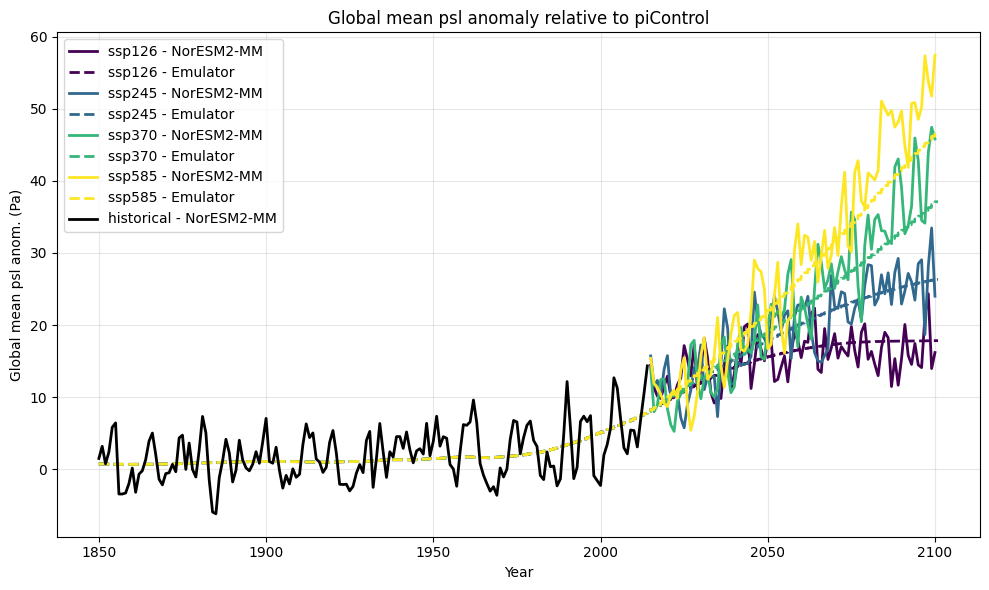

In [141]:
colors = {
    scen: color for scen, color in zip(
        pred_scenarios,
        plt.cm.viridis(np.linspace(0, 1, len(pred_scenarios)))
    )
}
colors['historical'] = 'black'

fig, ax = plt.subplots(figsize=(10, 6))
for scen in pred_scenarios:
    ax.plot(
        model_ts_anoms[scen].year + 2015,
        model_ts_anoms[scen],
        label=f"{scen} - NorESM2-MM",
        color=colors[scen],
        linewidth=2
    )
    emulator_ts = ens_scen_map[scen]['psl'].timeseries['global']
    n_months = emulator_ts.shape[1]
    years = 1850 + np.arange(n_months) / 12
    emulator_mean = emulator_ts.mean(axis=0)
    ax.plot(
        years,
        emulator_mean,
        label=f"{scen} - Emulator",
        color=colors[scen],
        linestyle='--',
        linewidth=2
    )
    if emulator_ts.shape[0] > 1:
        for realization in range(emulator_ts.shape[0]):
            ax.plot(
                years,
                emulator_ts[realization,:],
                alpha=.3,
                color=colors[scen],
                linewidth=.5
            )
ax.plot(
    model_ts_anoms['historical'].year + 1850,
    model_ts_anoms['historical'],
    label="historical - NorESM2-MM",
    color=colors['historical'],
    linewidth=2
)
ax.set_xlabel('Year')
ax.set_ylabel('Global mean psl anom. (Pa)')
ax.set_title('Global mean psl anomaly relative to piControl')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [155]:
model_gridded_anoms[scen]

<xarray.DataArray 'psl' (year: 86, lat: 192, lon: 288)> Size: 19MB
array([[[-349.76562  , -349.76562  , -349.76562  , ..., -349.76562  ,
         -349.76562  , -349.76562  ],
        [-360.4297   , -360.1328   , -359.71094  , ..., -361.5078   ,
         -361.10938  , -360.75     ],
        [-353.09375  , -352.5625   , -352.10938  , ..., -354.98438  ,
         -354.35156  , -353.70312  ],
        ...,
        [-462.7422   , -462.5703   , -462.27344  , ..., -462.9375   ,
         -462.7578   , -462.76562  ],
        [-462.125    , -461.9453   , -461.92188  , ..., -462.22656  ,
         -462.125    , -462.1172   ],
        [-458.3203   , -458.3203   , -458.3203   , ..., -458.3203   ,
         -458.3203   , -458.3203   ]],

       [[-517.0703   , -517.0703   , -517.0703   , ..., -517.0703   ,
         -517.0703   , -517.0703   ],
        [-492.67188  , -492.98438  , -493.1328   , ..., -492.10938  ,
         -492.29688  , -492.52344  ],
        [-472.72656  , -473.02344  , -473.34375  , ..., -472.07812  ,
         -472.3203   , -472.54688  ],
...
           -0.8046875,   -2.703125 ],
        [ -20.679688 ,  -21.546875 ,  -22.554688 , ...,  -17.765625 ,
          -18.632812 ,  -19.640625 ],
        [ -36.453125 ,  -36.453125 ,  -36.453125 , ...,  -36.453125 ,
          -36.453125 ,  -36.453125 ]],

       [[ -33.796875 ,  -33.796875 ,  -33.796875 , ...,  -33.796875 ,
          -33.796875 ,  -33.796875 ],
        [ -51.125    ,  -51.179688 ,  -51.085938 , ...,  -51.140625 ,
          -51.117188 ,  -51.125    ],
        [ -69.140625 ,  -69.11719  ,  -69.046875 , ...,  -69.203125 ,
          -69.21094  ,  -69.1875   ],
        ...,
        [-204.49219  , -204.16406  , -203.71094  , ..., -205.05469  ,
         -204.78906  , -204.67188  ],
        [-204.10938  , -204.       , -204.01562  , ..., -204.22656  ,
         -204.11719  , -204.08594  ],
        [-207.67188  , -207.67188  , -207.67188  , ..., -207.67188  ,
         -207.67188  , -207.67188  ]]],
      shape=(86, 192, 288), dtype=float32)
Coordinates:
  * year     (year) int64 688B 0 1 2 3 4 5 6 7 8 ... 77 78 79 80 81 82 83 84 85
  * lat      (lat) float64 2kB -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon      (lon) float64 2kB 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    comment:        Sea Level Pressure
    long_name:      Sea Level Pressure
    original_name:  PSL
    standard_name:  air_pressure_at_mean_sea_level
    units:          Pa

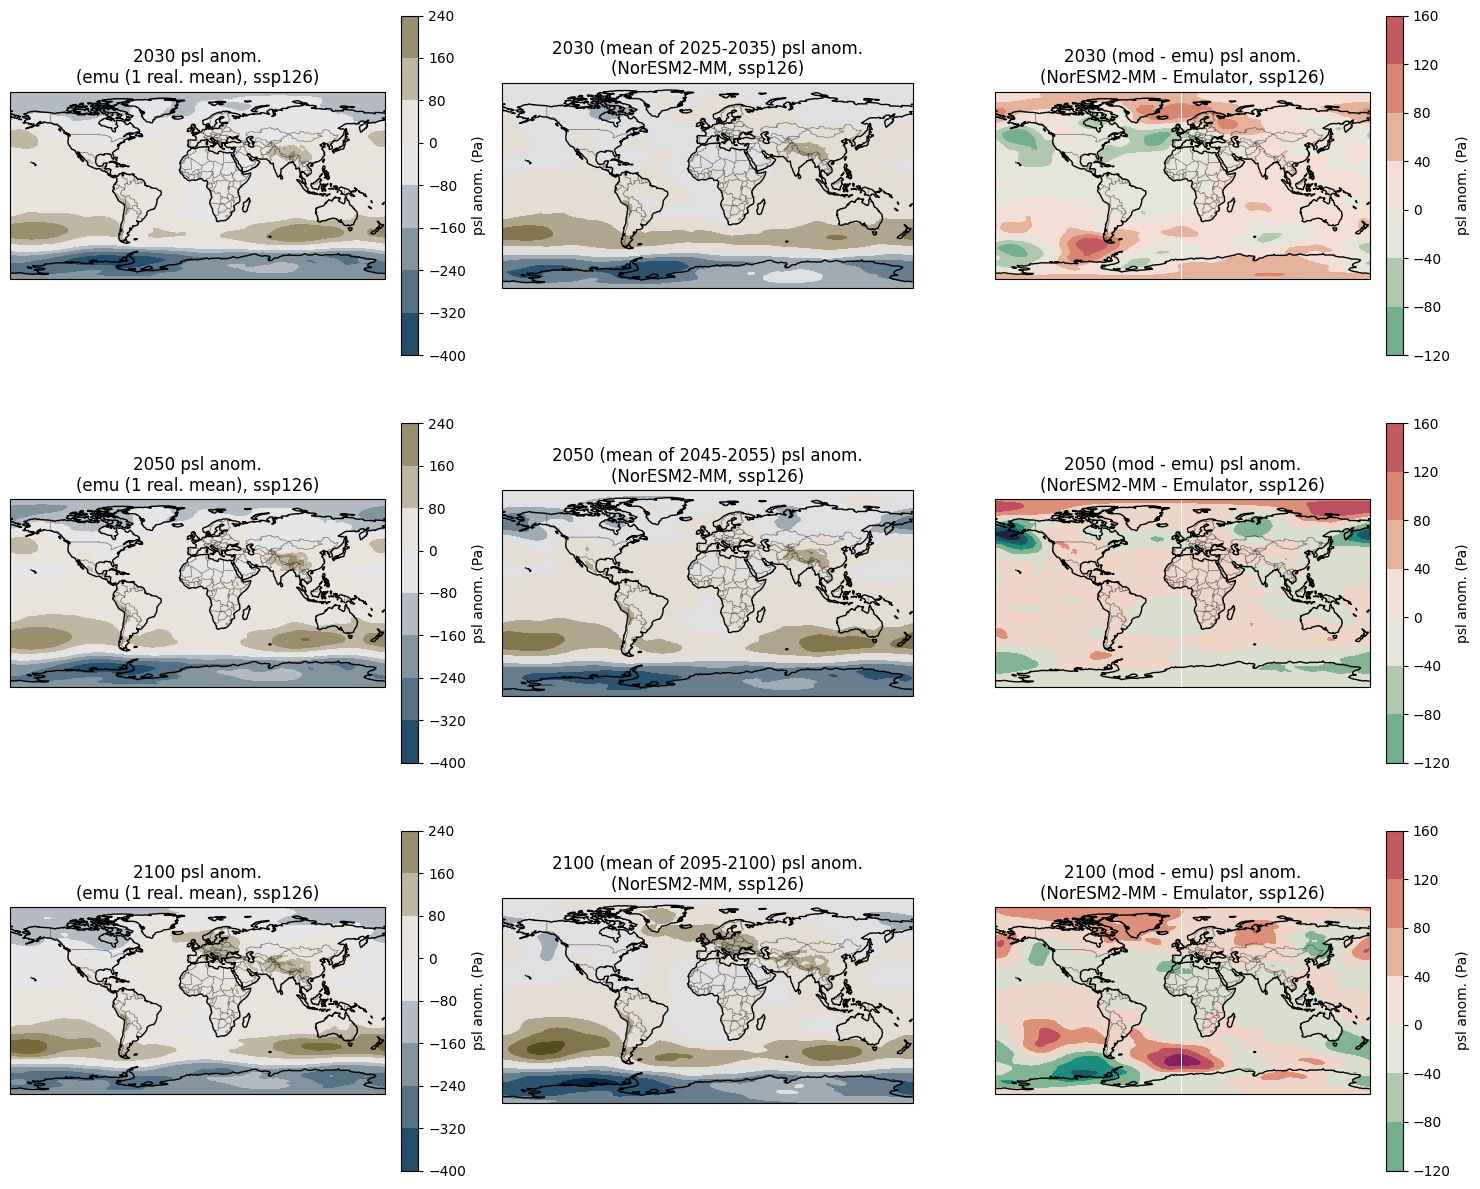

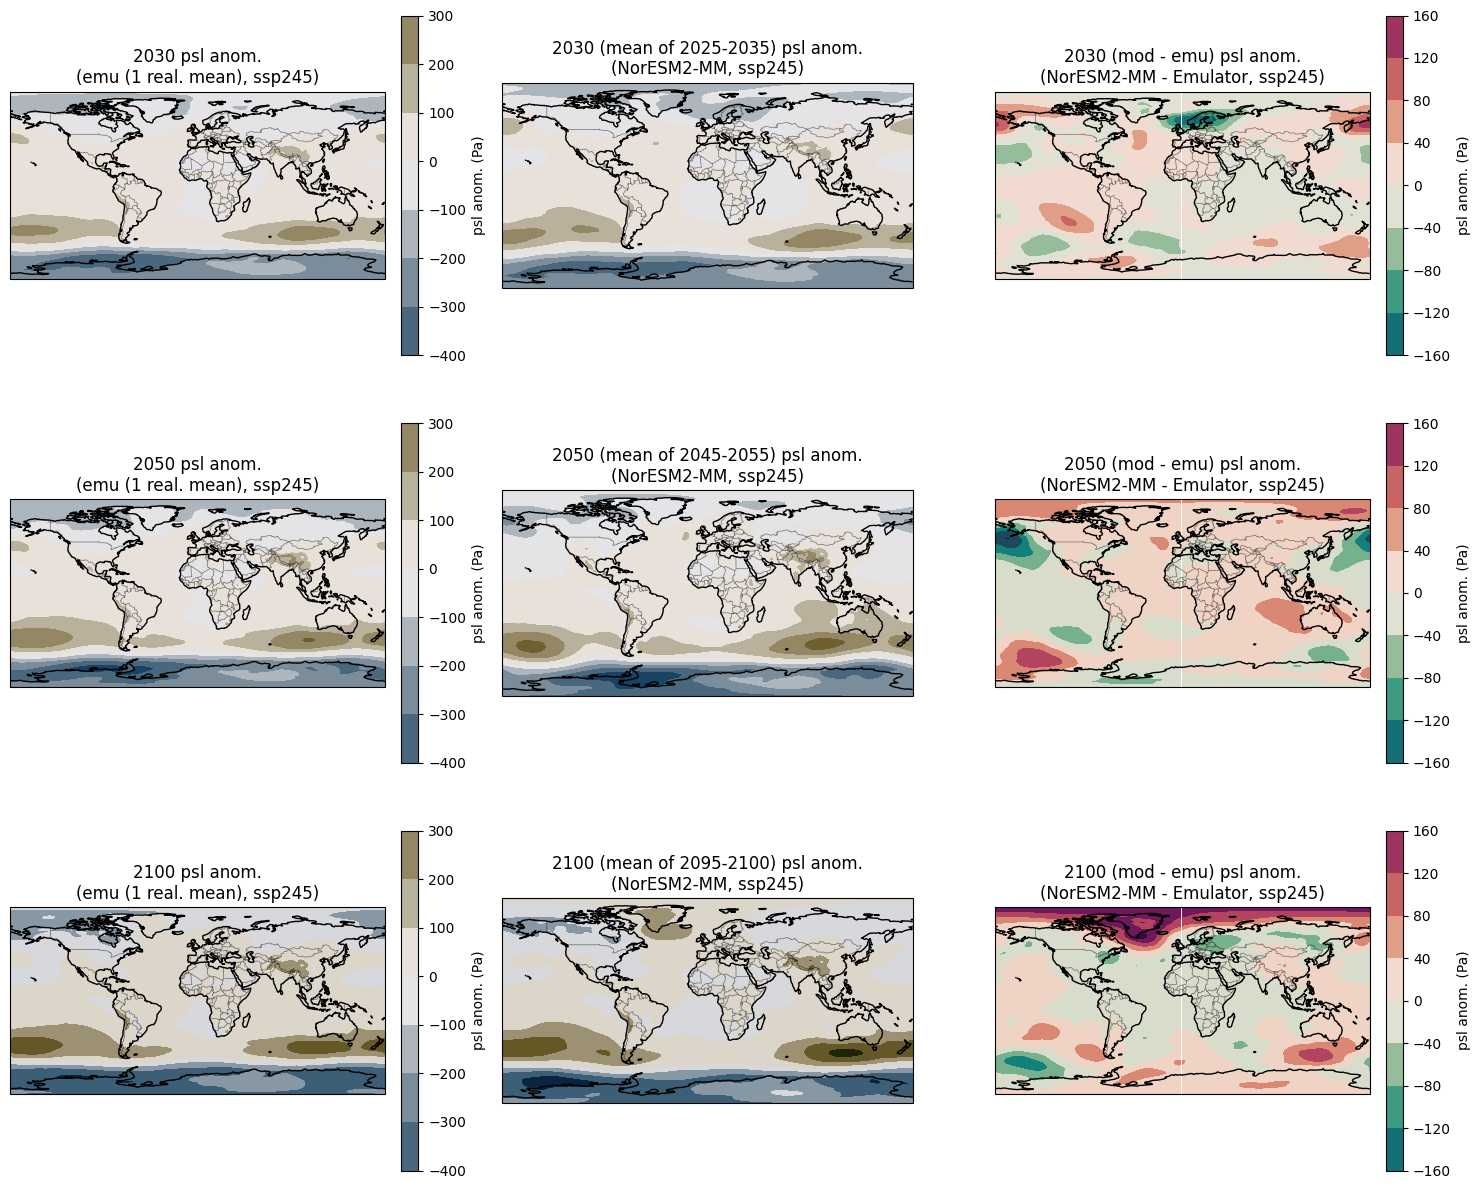

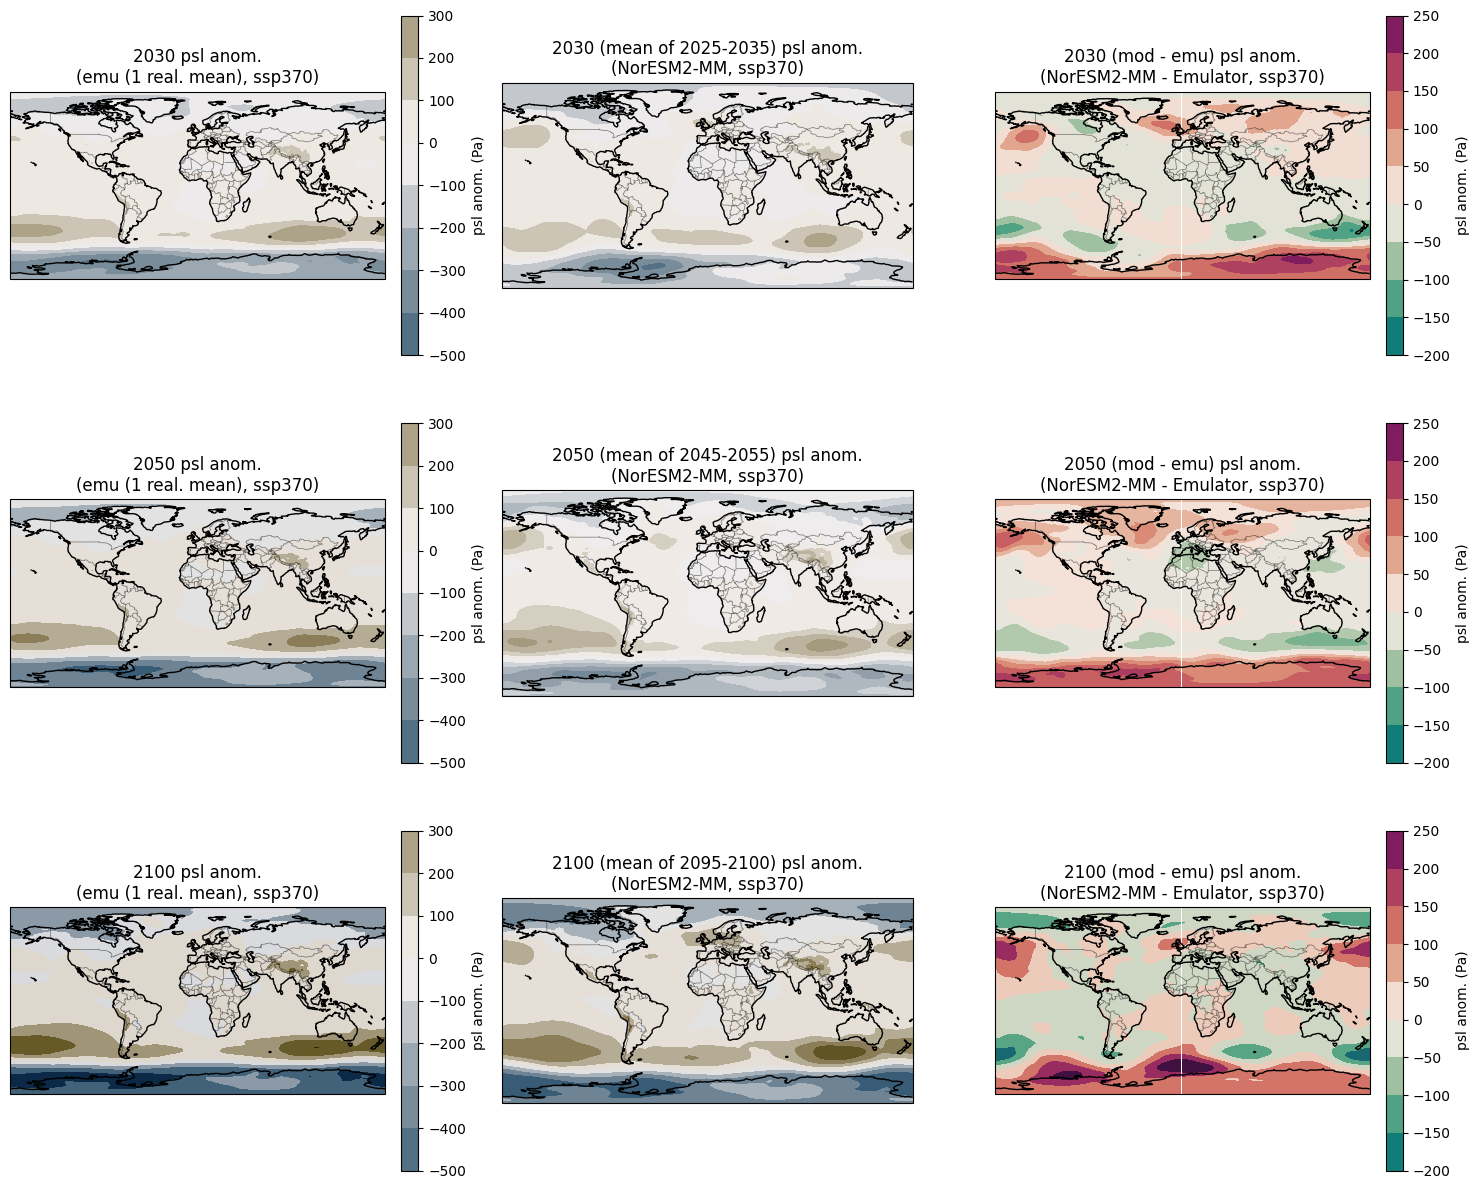

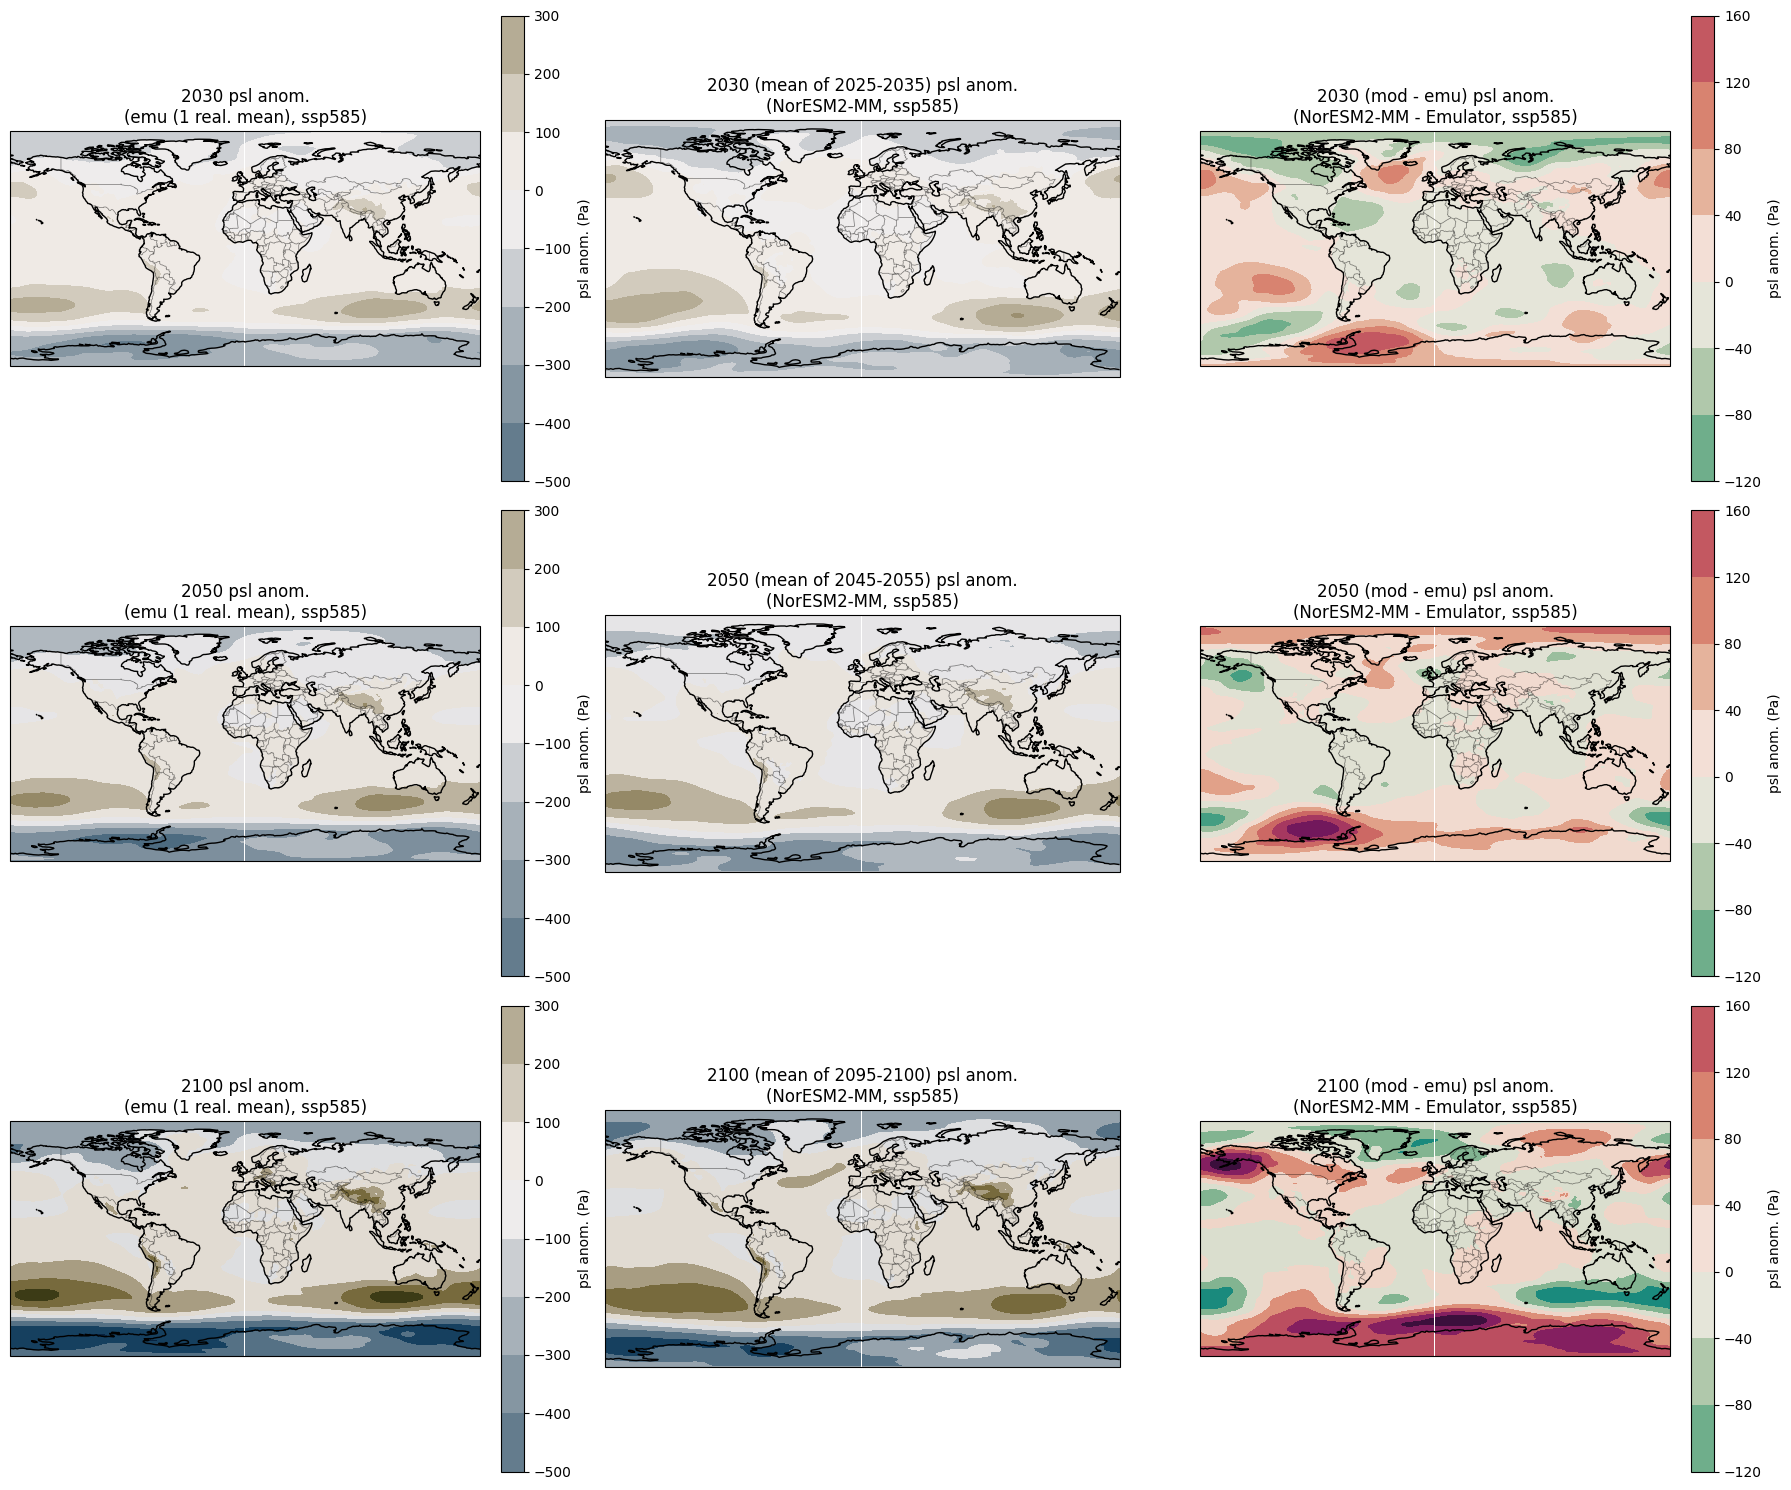

In [186]:

for scen in pred_scenarios:
    years_to_plot = [2030, 2050, 2100]
    nrows = len(years_to_plot)
    ncols = 3
    fig, axs = plt.subplots(
        nrows, ncols, figsize=(6*ncols, 5*nrows),
        subplot_kw={'projection': ccrs.PlateCarree()}
    )

    vals_col0 = []
    vals_col1 = []
    vals_col2 = []

    for year in years_to_plot:
        emu_field = ens_scen_map[scen]['psl'].gridded['annual'][year]
        emu_field_mean = emu_field.mean(dim='realization')
        vals_col0.append(emu_field_mean.values)

        min_year = max(year-2015-5, min(model_gridded_anoms[scen].year.values))
        max_year = min(year-2015+5, max(model_gridded_anoms[scen].year.values))
        years_to_average_mod_over = slice(min_year, max_year)
        mod_field = model_gridded_anoms[scen].sel(year=years_to_average_mod_over).mean(dim='year')
        vals_col1.append(mod_field.values)

        diff = mod_field - emu_field_mean
        vals_col2.append(diff.values)

    vmin = min(v.min() for v in vals_col0 + vals_col1)
    vmax = max(v.max() for v in vals_col0 + vals_col1)
    absmax = max(abs(vmin), abs(vmax))
    vmin, vmax = -absmax, absmax
    vmin_diff = min(v.min() for v in vals_col2)
    vmax_diff = max(v.max() for v in vals_col2)
    absmax_diff = max(abs(vmin_diff), abs(vmax_diff))
    vmin_diff, vmax_diff = -absmax_diff, absmax_diff

    ims_col0 = []
    ims_col1 = []
    ims_col2 = []

    for row_indx, year in enumerate(years_to_plot):

        emu_field = ens_scen_map[scen]['psl'].gridded['annual'][year]
        emu_field_mean = emu_field.mean(dim='realization')

        im0 = axs[row_indx, 0].contourf(
            emu_field_mean.lon,
            emu_field_mean.lat,
            emu_field_mean.values,
            cmap=cm.diff,
            vmin=vmin,
            vmax=vmax,
            transform=ccrs.PlateCarree()
        )
        ims_col0.append(im0)

        axs[row_indx, 0].set_title(
            f'{year} psl anom.\n(emu ({len(emu_field.realization)} real. mean), {scen})',
            fontsize=12
        )

        min_year = max(year-2015-5, min(model_gridded_anoms[scen].year.values))
        max_year = min(year-2015+5, max(model_gridded_anoms[scen].year.values))
        years_to_average_mod_over = slice(min_year, max_year)
        mod_field = model_gridded_anoms[scen].sel(year=years_to_average_mod_over).mean(dim='year')

        im1 = axs[row_indx, 1].contourf(
            mod_field.lon,
            mod_field.lat,
            mod_field.values,
            cmap=cm.diff,
            vmin=vmin,
            vmax=vmax,
            transform=ccrs.PlateCarree()
        )
        ims_col1.append(im1)

        axs[row_indx, 1].set_title(
            f'{year} (mean of {min_year+2015}-{max_year+2015}) psl anom.\n(NorESM2-MM, {scen})',
            fontsize=12
        )

        diff = mod_field - emu_field_mean

        im2 = axs[row_indx, 2].contourf(
            diff.lon,
            diff.lat,
            diff.values,
            cmap=cm.curl,
            vmin=vmin_diff,
            vmax=vmax_diff,
            transform=ccrs.PlateCarree()
        )
        ims_col2.append(im2)
        axs[row_indx, 2].set_title(
            f'{year} (mod - emu) psl anom.\n(NorESM2-MM - Emulator, {scen})',
            fontsize=12
        )
    for ax in axs.flat:
        ax.coastlines()
        ax.add_feature(cfeature.BORDERS, linewidth=0.5, alpha=0.5)

    for ax in axs[:, 0]:
        cbar = fig.colorbar(ims_col0[0], ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
        cbar.set_label('psl anom. (Pa)', fontsize=10)

    for ax in axs[:, 2]:
        cbar = fig.colorbar(ims_col2[0], ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
        cbar.set_label('psl anom. (Pa)', fontsize=10)

plt.tight_layout()
plt.show()

# PSL

In [4]:
# exploratory analysis for psl input data
from pathlib import Path
cache_dir = Path('/nird/datalake/NS9560K/johannef/FYS9429/cache/cmip6')

In [6]:
from meteor.geo_data_utils import global_mean
import xarray as xr

In [7]:
def quick_ts_plot(mon_data: list[Path], year_data: list[Path], var: str, ylabel: str = ''):
    global_means_mon = {}
    global_means_yearly = {}

    for mon_file, year_file in zip(mon_data, year_data):
        with xr.open_dataset(mon_file) as ds:
            # squeeze ens dimension
            ds = ds.squeeze('ens', drop=True)
            psl = ds[var]
            psl_gm = global_mean(psl)
            global_means_mon[mon_file.name] = psl_gm
        with xr.open_dataset(year_file) as ds:
            # squeeze ens dimension
            ds = ds.squeeze('ens', drop=True)
            psl = ds[var]
            psl_gm = global_mean(psl)
            psl_gm = psl_gm.assign_coords({'year': psl_gm['year'] * 12 + 6})  # assign mid-year month for plotting
            psl_gm = psl_gm.rename({'year': 'month'})  # rename coordinate for consistency with monthly data
            global_means_yearly[year_file.name] = psl_gm

    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12), sharey=True)

    for filename, psl_gm in global_means_mon.items():
        if any(s in filename for s in ['ssp', 'hist']):
            (psl_gm * 1e-2).plot(ax=axes[0], label=filename)
        elif any(s in filename for s in ['piControl', 'abrupt']):
            (psl_gm * 1e-2).plot(ax=axes[1], label=filename)

    for filename, psl_gm in global_means_yearly.items():
        if any(s in filename for s in ['ssp', 'hist']):
            (psl_gm * 1e-2).plot(ax=axes[0], label=filename)
        elif any(s in filename for s in ['piControl', 'abrupt']):
            (psl_gm * 1e-2).plot(ax=axes[1], label=filename)

    for ax in axes:
        ax.set_xlabel('month')
        ax.set_ylabel(ylabel)
        ax.set_title("")
        ax.legend()

    plt.show()

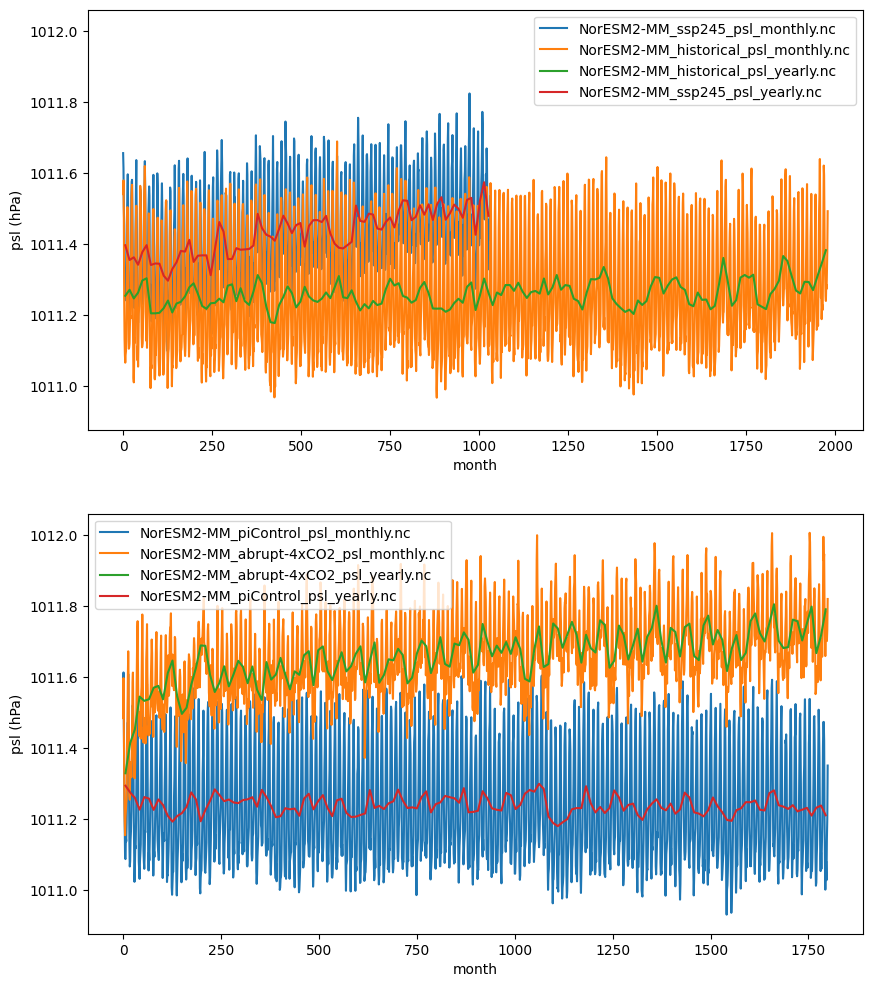

In [88]:
psl_mon_data = list(cache_dir.glob('*psl_monthly*'))
psl_year_data = list(cache_dir.glob('*psl_yearly*'))
quick_ts_plot(psl_mon_data, psl_year_data, var='psl', ylabel='psl (hPa)')

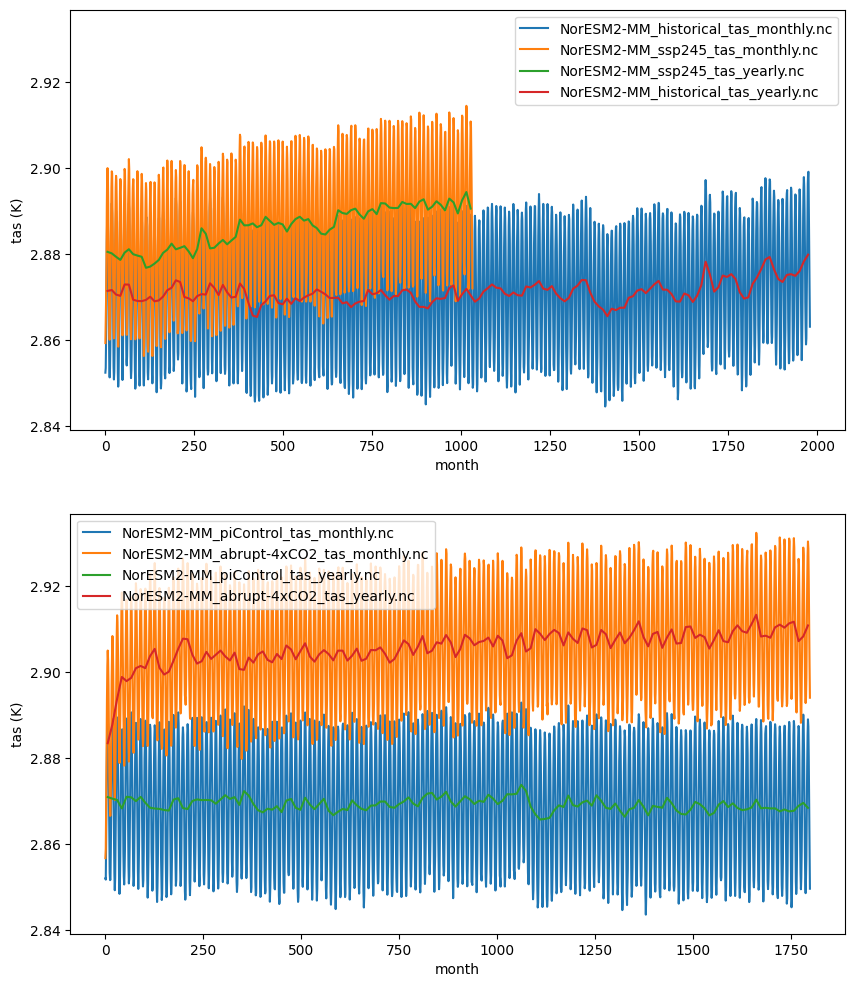

In [89]:
var = 'tas'
mon_data = list(cache_dir.glob(f'*{var}_monthly*'))
year_data = list(cache_dir.glob(f'*{var}_yearly*'))
quick_ts_plot(mon_data, year_data, var=var, ylabel=f'tas (K)')

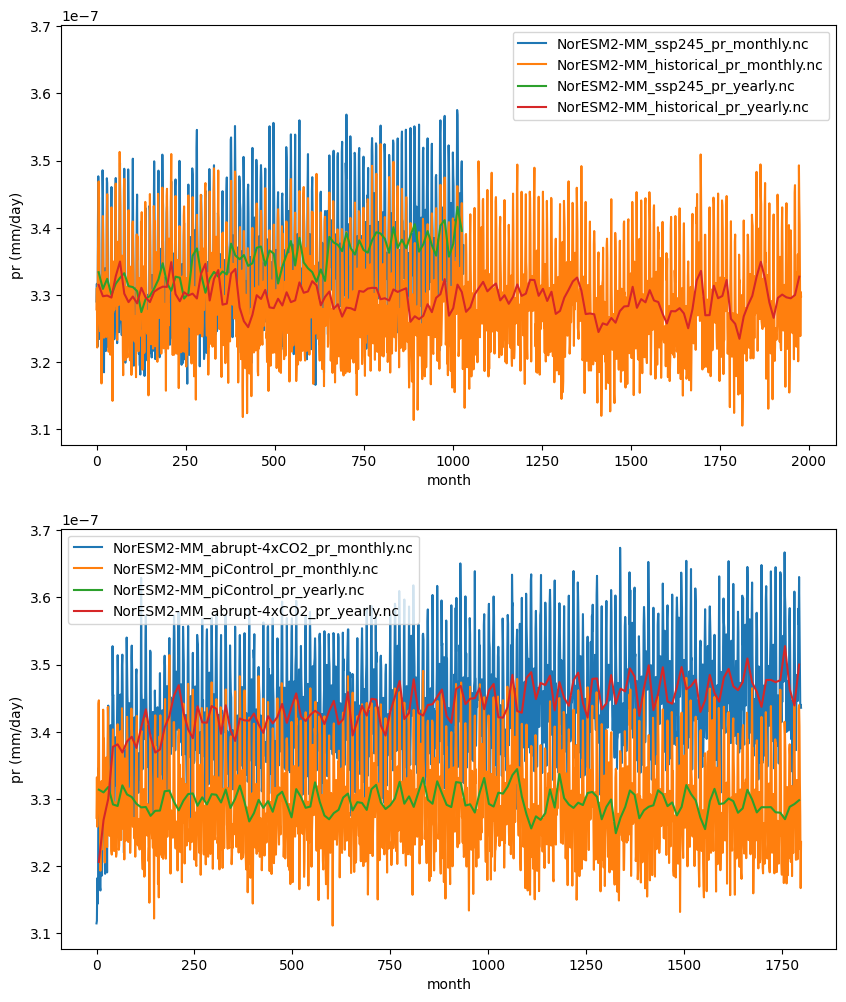

In [90]:
var = 'pr'
mon_data = list(cache_dir.glob(f'*{var}_monthly*'))
year_data = list(cache_dir.glob(f'*{var}_yearly*'))
quick_ts_plot(mon_data, year_data, var=var, ylabel=f'pr (mm/day)')

## Distributional plots

Examples of using `quick_dist_plot` to visualize spatial distributions

In [14]:
def quick_dist_plot(
    mon_data: list[Path], 
    year_data: list[Path], 
    var: str, 
    xlabel: str = '',
    temporal_agg: str = 'yearly',  # 'yearly', 'monthly', 'seasonal'
    year: int = None,  # specific year for monthly/seasonal, or center of period
    period_years: int = 1,  # number of years to average over
    month: int = None,  # specific month (1-12) for monthly plots
    season: str = None,  # 'DJF', 'MAM', 'JJA', 'SON' for seasonal
    bins: int = 50,
    scaling_factor: float = 1.0):
    """
    Plot distributional histograms of spatial fields across different temporal aggregations.
    
    Parameters
    ----------
    mon_data : list[Path]
        List of monthly data files
    year_data : list[Path]
        List of yearly data files
    var : str
        Variable name to plot
    xlabel : str
        X-axis label
    temporal_agg : str
        'yearly': yearly mean over period_years
        'monthly': specific month across years
        'seasonal': seasonal mean (DJF, MAM, JJA, SON)
    year : int
        Center year for the period (yearly/seasonal) or specific year (monthly)
    period_years : int
        Number of years to average (for yearly/seasonal)
    month : int
        Month number 1-12 (for monthly)
    season : str
        Season name: 'DJF', 'MAM', 'JJA', 'SON' (for seasonal)
    bins : int
        Number of histogram bins
    scaling_factor : float
        Multiply values by this factor for plotting
    """
    season_months = {
        'DJF': [12, 1, 2],
        'MAM': [3, 4, 5],
        'JJA': [6, 7, 8],
        'SON': [9, 10, 11]
    }
    
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))
    
    for file_list, ax in [(mon_data, axes[0]), (year_data, axes[1])]:
        for data_file in file_list:
            with xr.open_dataset(data_file) as ds:
                ds = ds.squeeze('ens', drop=True)
                field = ds[var]
                
                # Select temporal subset based on aggregation type
                if temporal_agg == 'yearly':
                    # Use yearly data, average over period
                    if 'year' in field.dims:
                        if year is not None:
                            start_year = year - period_years // 2
                            end_year = year + period_years // 2
                            field_subset = field.sel(year=slice(start_year, end_year)).mean(dim='year')
                        else:
                            field_subset = field.mean(dim='year')
                    else:
                        # Monthly data - need to convert
                        continue
                        
                elif temporal_agg == 'monthly':
                    # Use monthly data, extract specific month
                    if 'month' in field.dims:
                        if year is not None and month is not None:
                            # Calculate month index for specific year and month
                            # Assuming month dimension is 0-indexed from start
                            # This is approximation - adjust based on your data structure
                            field_subset = field.isel(month=month - 1)  # Just take first occurrence of that month
                        elif month is not None:
                            # Average that month across all years
                            n_years = field.sizes['month'] // 12
                            field_reshaped = field.isel(month=slice(0, n_years * 12)).values.reshape(n_years, 12, *field.shape[1:])
                            field_subset = xr.DataArray(
                                field_reshaped[:, month - 1, :, :].mean(axis=0),
                                coords={'lat': field.coords['lat'], 'lon': field.coords['lon']},
                                dims=['lat', 'lon']
                            )
                        else:
                            continue
                    else:
                        # Yearly data - skip for monthly plots
                        continue
                        
                elif temporal_agg == 'seasonal':
                    # Use monthly data, extract and average seasonal months
                    if 'month' in field.dims and season in season_months:
                        season_month_nums = season_months[season]
                        n_years = field.sizes['month'] // 12
                        
                        if year is not None:
                            # Specific year range
                            start_year = year - period_years // 2
                            end_year = year + period_years // 2
                            year_indices = range(max(0, start_year), min(n_years, end_year + 1))
                        else:
                            year_indices = range(n_years)
                        
                        # Extract seasonal months
                        seasonal_fields = []
                        for yr_idx in year_indices:
                            for month_num in season_month_nums:
                                month_idx = yr_idx * 12 + (month_num - 1)
                                if month_idx < field.sizes['month']:
                                    seasonal_fields.append(field.isel(month=month_idx))
                        
                        if seasonal_fields:
                            field_subset = xr.concat(seasonal_fields, dim='time').mean(dim='time')
                        else:
                            continue
                    else:
                        # Yearly data - skip for seasonal plots
                        continue
                else:
                    raise ValueError(f"Unknown temporal_agg: {temporal_agg}")
                
                # Plot histogram of all spatial values
                values = (field_subset.values.flatten() * scaling_factor)
                values = values[~np.isnan(values)]  # Remove NaN values
                
                # Determine which subplot based on filename
                label = data_file.name
                if any(s in label for s in ['ssp', 'hist']):
                    if file_list == mon_data:
                        axes[0].hist(values, bins=bins, alpha=0.5, label=label, density=True)
                    # Don't plot yearly files in scenario plot if using monthly agg
                elif any(s in label for s in ['piControl', 'abrupt']):
                    if file_list == mon_data or temporal_agg == 'yearly':
                        axes[1].hist(values, bins=bins, alpha=0.5, label=label, density=True)
    
    # Format plots
    title_parts = []
    if temporal_agg == 'yearly':
        if year and period_years > 1:
            title_parts.append(f"Yearly mean ({year-period_years//2}-{year+period_years//2})")
        elif year:
            title_parts.append(f"Year {year}")
        else:
            title_parts.append("All years mean")
    elif temporal_agg == 'monthly':
        month_names = ['', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
        if month and year:
            title_parts.append(f"{month_names[month]} {year}")
        elif month:
            title_parts.append(f"{month_names[month]} (all years)")
    elif temporal_agg == 'seasonal':
        if season:
            if year and period_years > 1:
                title_parts.append(f"{season} ({year-period_years//2}-{year+period_years//2})")
            elif year:
                title_parts.append(f"{season} year {year}")
            else:
                title_parts.append(f"{season} (all years)")
    
    for ax, exp_type in zip(axes, ['Historical/SSP', 'Control/Abrupt']):
        ax.set_xlabel(xlabel)
        ax.set_ylabel('Probability Density')
        title = f"{exp_type}"
        if title_parts:
            title += f" - {title_parts[0]}"
        ax.set_title(title)
        ax.legend()
        ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_1238164/4255999757.py:172: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


/tmp/ipykernel_1238164/4255999757.py:172: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


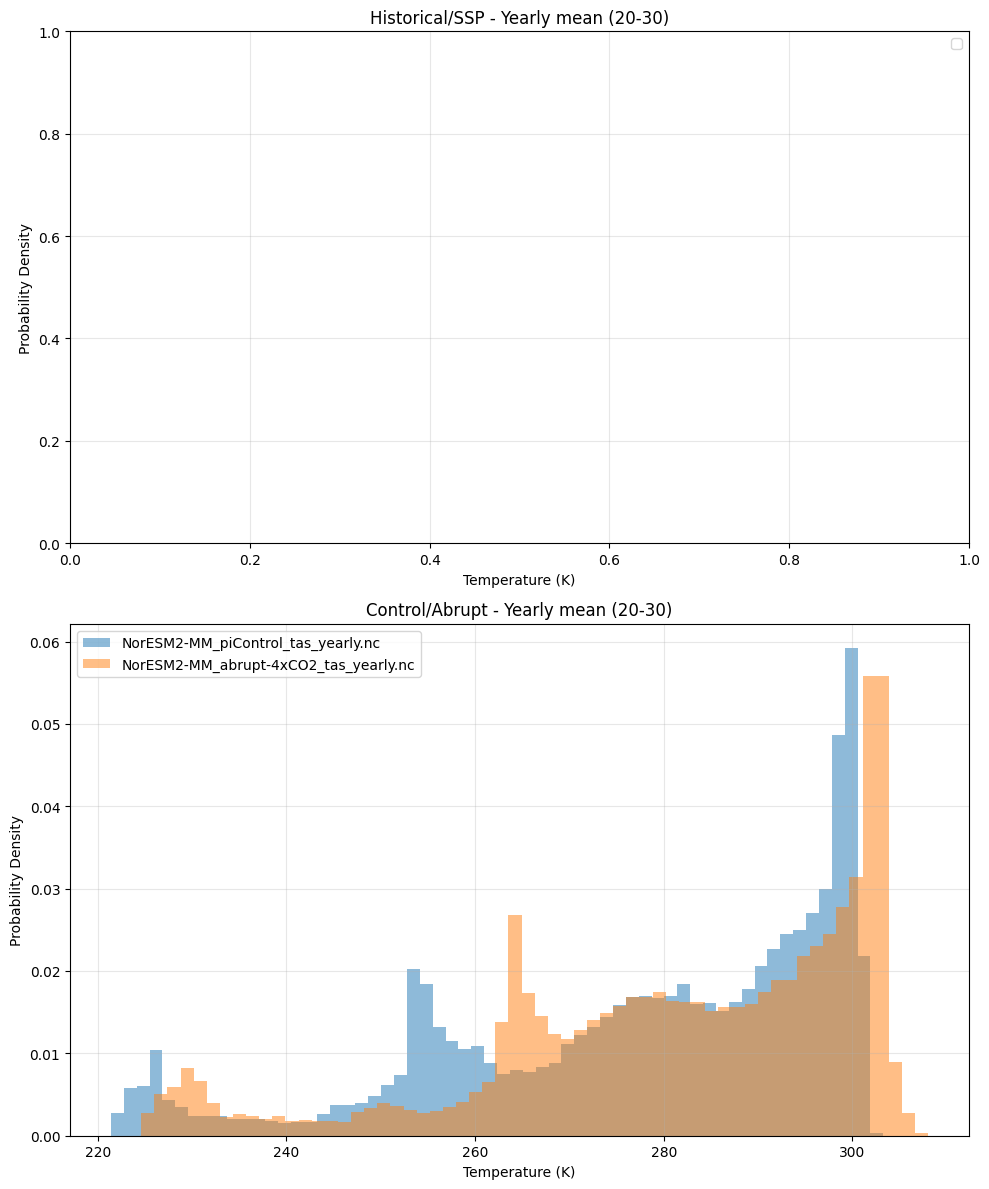

In [15]:
# Example 1: Yearly mean distribution for a specific period (e.g., 2020-2030)
var = 'tas'
mon_data = list(cache_dir.glob(f'*{var}_monthly*'))
year_data = list(cache_dir.glob(f'*{var}_yearly*'))

quick_dist_plot(
    mon_data, 
    year_data, 
    var=var, 
    xlabel='Temperature (K)',
    temporal_agg='yearly',
    year=25,  # Year index (approximate 2025 in the data)
    period_years=10,  # Average over 10-year period
    bins=60,
    scaling_factor=1.0
)

/tmp/ipykernel_1238164/4255999757.py:172: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


/tmp/ipykernel_1238164/4255999757.py:172: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


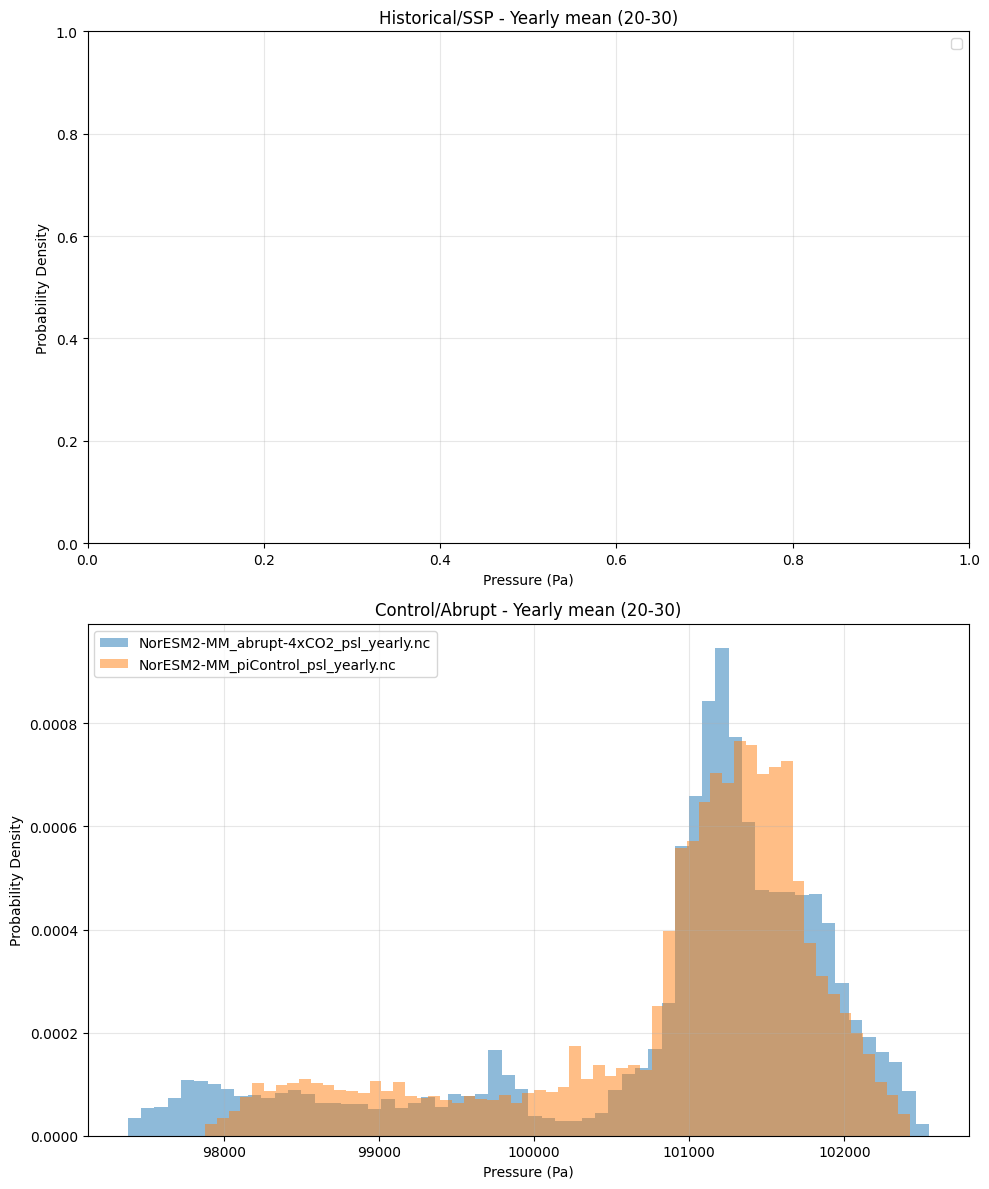

In [16]:
# Example 1: Yearly mean distribution for a specific period (e.g., 2020-2030)
var = 'psl'
mon_data = list(cache_dir.glob(f'*{var}_monthly*'))
year_data = list(cache_dir.glob(f'*{var}_yearly*'))

quick_dist_plot(
    mon_data, 
    year_data, 
    var=var, 
    xlabel='Pressure (Pa)',
    temporal_agg='yearly',
    year=25,  # Year index (approximate 2025 in the data)
    period_years=10,  # Average over 10-year period
    bins=60,
    scaling_factor=1.0
)

/tmp/ipykernel_1238164/4255999757.py:172: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


/tmp/ipykernel_1238164/4255999757.py:172: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


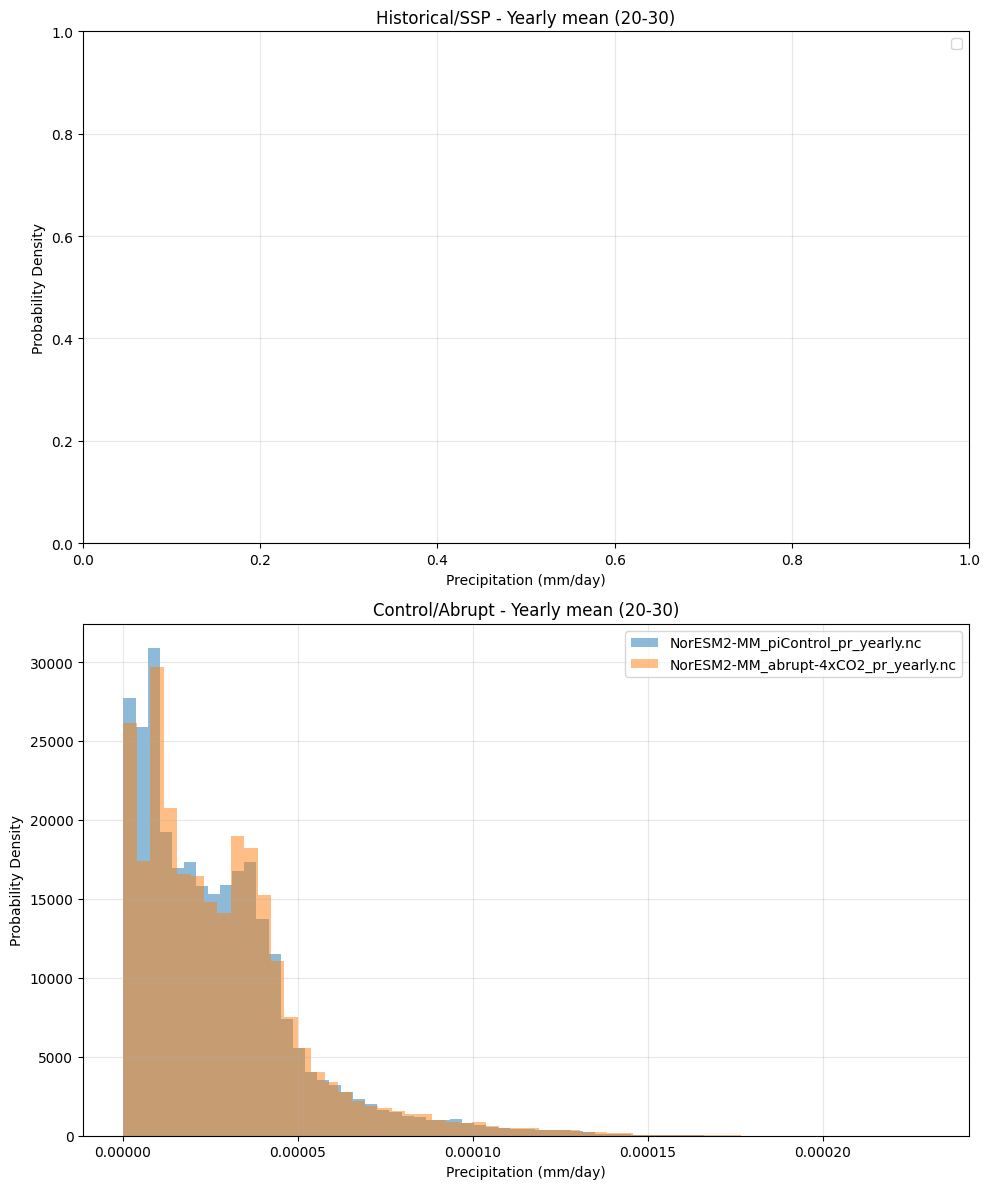

In [17]:
# Example 1: Yearly mean distribution for a specific period (e.g., 2020-2030)
var = 'pr'
mon_data = list(cache_dir.glob(f'*{var}_monthly*'))
year_data = list(cache_dir.glob(f'*{var}_yearly*'))

quick_dist_plot(
    mon_data, 
    year_data, 
    var=var, 
    xlabel='Precipitation (mm/day)',
    temporal_agg='yearly',
    year=25,  # Year index (approximate 2025 in the data)
    period_years=10,  # Average over 10-year period
    bins=60,
    scaling_factor=1.0
)

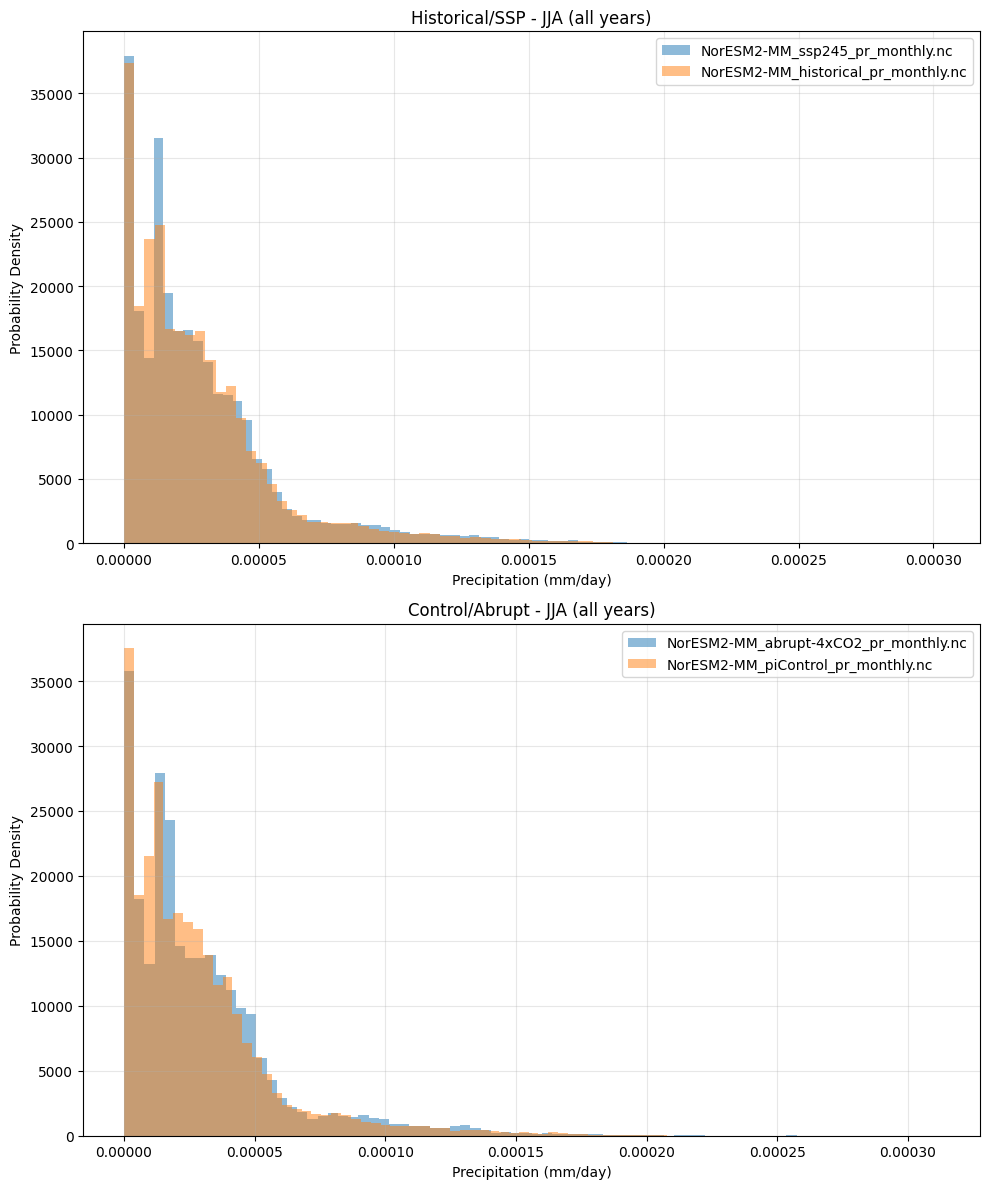

In [97]:
# Example 5: Summer (JJA) seasonal distribution for precipitation
var = 'pr'
mon_data = list(cache_dir.glob(f'*{var}_monthly*'))
year_data = list(cache_dir.glob(f'*{var}_yearly*'))

if mon_data and year_data:  # Only run if we have pr data
    quick_dist_plot(
        mon_data, 
        year_data, 
        var=var, 
        xlabel='Precipitation (mm/day)',
        temporal_agg='seasonal',
        season='JJA',  # June-July-August (summer)
        bins=80,
        scaling_factor=1.0
    )

## Map view plots

Examples of using `quick_map_plot` to visualize spatial patterns

In [8]:
def quick_map_plot(
    mon_data: list[Path],
    year_data: list[Path],
    var: str,
    cbar_label: str = '',
    temporal_agg: str = 'yearly',  # 'yearly', 'monthly', 'seasonal'
    year: int = None,  # specific year for monthly/seasonal, or center of period
    period_years: int = 1,  # number of years to average over
    month: int = None,  # specific month (1-12) for monthly plots
    season: str = None,  # 'DJF', 'MAM', 'JJA', 'SON' for seasonal
    scaling_factor: float = 1.0,
    cmap: str = 'RdBu_r',
    vmin: float = None,
    vmax: float = None,
    vmin_diff: float = None,
    vmax_diff: float = None,
    projection = None,
    figsize: tuple = None):
    """
    Plot spatial maps with organized layout:
    - Row 1: piControl | abrupt-4xCO2 | difference (abrupt-control)
    - Rows 2+: historical | SSP scenario | difference (SSP-historical), one row per SSP

    Parameters
    ----------
    mon_data : list[Path]
        List of monthly data files
    year_data : list[Path]
        List of yearly data files
    var : str
        Variable name to plot
    cbar_label : str
        Colorbar label for absolute values
    temporal_agg : str
        'yearly', 'monthly', or 'seasonal'
    year : int
        Center year for aggregation
    period_years : int
        Number of years to average
    month : int
        Month number 1-12
    season : str
        Season name: 'DJF', 'MAM', 'JJA', 'SON'
    scaling_factor : float
        Multiply values by this factor
    cmap : str
        Colormap for absolute values
    vmin, vmax : float
        Color scale limits for absolute values
    vmin_diff, vmax_diff : float
        Color scale limits for differences (symmetric if None)
    projection : cartopy projection
        Map projection (default: PlateCarree)
    figsize : tuple
        Figure size (auto-calculated if None)
    """
    season_months = {
        'DJF': [12, 1, 2],
        'MAM': [3, 4, 5],
        'JJA': [6, 7, 8],
        'SON': [9, 10, 11]
    }

    if projection is None:
        projection = ccrs.PlateCarree()

    def extract_field(data_file, temporal_agg, year, period_years, month, season):
        """Helper to extract temporal subset from a file"""
        with xr.open_dataset(data_file) as ds:
            ds = ds.squeeze('ens', drop=True)
            field = ds[var]

            if temporal_agg == 'yearly':
                if 'year' in field.dims:
                    if year is not None:
                        start_year = year - period_years // 2
                        end_year = year + period_years // 2
                        field_subset = field.sel(year=slice(start_year, end_year)).mean(dim='year')
                    else:
                        field_subset = field.mean(dim='year')
                else:
                    return None

            elif temporal_agg == 'monthly':
                if 'month' in field.dims and month is not None:
                    n_years = field.sizes['month'] // 12
                    field_reshaped = field.isel(month=slice(0, n_years * 12)).values.reshape(n_years, 12, *field.shape[1:])
                    field_subset = xr.DataArray(
                        field_reshaped[:, month - 1, :, :].mean(axis=0),
                        coords={'lat': field.coords['lat'], 'lon': field.coords['lon']},
                        dims=['lat', 'lon']
                    )
                else:
                    return None

            elif temporal_agg == 'seasonal':
                if 'month' in field.dims and season in season_months:
                    season_month_nums = season_months[season]
                    n_years = field.sizes['month'] // 12

                    if year is not None:
                        start_year = year - period_years // 2
                        end_year = year + period_years // 2
                        year_indices = range(max(0, start_year), min(n_years, end_year + 1))
                    else:
                        year_indices = range(n_years)

                    seasonal_fields = []
                    for yr_idx in year_indices:
                        for month_num in season_month_nums:
                            month_idx = yr_idx * 12 + (month_num - 1)
                            if month_idx < field.sizes['month']:
                                seasonal_fields.append(field.isel(month=month_idx))

                    if seasonal_fields:
                        field_subset = xr.concat(seasonal_fields, dim='time').mean(dim='time')
                    else:
                        return None
                else:
                    return None
            else:
                return None

            return field_subset

    # Organize files by experiment type
    all_files = mon_data + year_data
    fields_by_exp = {}

    for data_file in all_files:
        filename = data_file.name
        field = extract_field(data_file, temporal_agg, year, period_years, month, season)
        if field is None:
            continue

        field = field * scaling_factor

        # Categorize by experiment
        if 'piControl' in filename:
            fields_by_exp.setdefault('piControl', []).append((filename, field))
        elif 'abrupt-4xCO2' in filename:
            fields_by_exp.setdefault('abrupt', []).append((filename, field))
        elif 'historical' in filename:
            fields_by_exp.setdefault('historical', []).append((filename, field))
        elif any(ssp in filename for ssp in ['ssp126', 'ssp245', 'ssp370', 'ssp585']):
            ssp_type = [s for s in ['ssp126', 'ssp245', 'ssp370', 'ssp585'] if s in filename][0]
            fields_by_exp.setdefault(ssp_type, []).append((filename, field))

    # Get unique SSP scenarios in order
    ssp_scenarios = [s for s in ['ssp126', 'ssp245', 'ssp370', 'ssp585'] if s in fields_by_exp]
    n_ssp = len(ssp_scenarios)
    n_rows = 1 + n_ssp  # 1 row for control/abrupt, n_ssp rows for scenarios

    if figsize is None:
        figsize = (18, 5 * n_rows)

    fig, axes = plt.subplots(
        nrows=n_rows,
        ncols=3,
        figsize=figsize,
        subplot_kw={'projection': projection}
    )

    if n_rows == 1:
        axes = axes.reshape(1, -1)

    # Collect all fields by column to compute shared color scales
    col01_fields = []  # Columns 0 and 1 share same scale (piControl/historical and abrupt/SSP)
    col2_fields = []  # Differences (centered at 0)

    # Row 0: piControl | abrupt-4xCO2 | difference
    if 'piControl' in fields_by_exp and 'abrupt' in fields_by_exp:
        control = fields_by_exp['piControl'][0][1]
        abrupt = fields_by_exp['abrupt'][0][1]
        diff = abrupt - control  # Second - First
        col01_fields.append(control)
        col01_fields.append(abrupt)
        col2_fields.append(diff)

    # Rows 1+: historical | scenario | difference
    for row_idx, ssp in enumerate(ssp_scenarios, start=1):
        if 'historical' in fields_by_exp and ssp in fields_by_exp:
            hist = fields_by_exp['historical'][0][1]
            scenario = fields_by_exp[ssp][0][1]
            diff = scenario - hist  # Second - First
            col01_fields.append(hist)
            col01_fields.append(scenario)
            col2_fields.append(diff)

    # Compute shared color scales
    def compute_scale(fields, vmin_input=None, vmax_input=None):
        if vmin_input is not None and vmax_input is not None:
            return vmin_input, vmax_input
        all_vals = np.concatenate([f.values.flatten() for f in fields])
        all_vals = all_vals[~np.isnan(all_vals)]
        vmin_computed = vmin_input if vmin_input is not None else np.percentile(all_vals, 2)
        vmax_computed = vmax_input if vmax_input is not None else np.percentile(all_vals, 98)
        return vmin_computed, vmax_computed

    # Compute divergent scale (centered at 0)
    def compute_divergent_scale(fields, vmin_input=None, vmax_input=None):
        if vmin_input is not None and vmax_input is not None:
            return vmin_input, vmax_input
        all_vals = np.concatenate([f.values.flatten() for f in fields])
        all_vals = all_vals[~np.isnan(all_vals)]
        vmin_computed = vmin_input if vmin_input is not None else np.percentile(all_vals, 2)
        vmax_computed = vmax_input if vmax_input is not None else np.percentile(all_vals, 98)
        # Center at 0 for divergent colormaps
        vabs = max(abs(vmin_computed), abs(vmax_computed))
        return -vabs, vabs

    # Compute color scales
    vmin_col01, vmax_col01 = compute_scale(col01_fields, vmin, vmax) if col01_fields else (None, None)
    vmin_col2, vmax_col2 = compute_divergent_scale(col2_fields, vmin_diff, vmax_diff) if col2_fields else (None, None)

    # Helper function to plot a field
    def plot_field(ax, field, label, col_idx, is_diff, cbar_label_use):
        """Plot a single field on the given axes"""
        # Determine colormap and scale based on column
        if col_idx in [0, 1]:
            cmap_use = cmap
            vmin_use, vmax_use = vmin_col01, vmax_col01
        else:  # col_idx == 2 (difference)
            cmap_use = 'RdBu_r'
            vmin_use, vmax_use = vmin_col2, vmax_col2

        im = ax.contourf(
            field.coords['lon'],
            field.coords['lat'],
            field.values,
            levels=20,
            cmap=cmap_use,
            vmin=vmin_use,
            vmax=vmax_use,
            transform=ccrs.PlateCarree(),
            extend='both'
        )

        ax.coastlines(linewidth=0.5)
        ax.add_feature(cfeature.BORDERS, linewidth=0.3, alpha=0.5)
        ax.set_title(label, fontsize=10, fontweight='bold')

        cbar = plt.colorbar(im, ax=ax, orientation='horizontal', pad=0.05, shrink=0.8)
        cbar.set_label(cbar_label_use, fontsize=9)

    # Row 0: piControl | abrupt-4xCO2 | difference
    if 'piControl' in fields_by_exp and 'abrupt' in fields_by_exp:
        control = fields_by_exp['piControl'][0][1]
        abrupt = fields_by_exp['abrupt'][0][1]
        diff = abrupt - control
        
        plot_field(axes[0, 0], control, 'piControl', 0, False, cbar_label)
        plot_field(axes[0, 1], abrupt, 'abrupt-4xCO2', 1, False, cbar_label)
        plot_field(axes[0, 2], diff, 'abrupt - piControl', 2, True, f'{var} difference')
    
    # Rows 1+: historical | scenario | difference
    for row_idx, ssp in enumerate(ssp_scenarios, start=1):
        if 'historical' in fields_by_exp and ssp in fields_by_exp:
            hist = fields_by_exp['historical'][0][1]
            scenario = fields_by_exp[ssp][0][1]
            diff = scenario - hist
            
            plot_field(axes[row_idx, 0], hist, 'historical', 0, False, cbar_label)
            plot_field(axes[row_idx, 1], scenario, ssp.upper(), 1, False, cbar_label)
            plot_field(axes[row_idx, 2], diff, f'{ssp} - historical', 2, True, f'{var} difference')
    title_parts = []
    if temporal_agg == 'yearly':
        if year and period_years > 1:
            title_parts.append(f"Yearly mean ({year-period_years//2}-{year+period_years//2})")
        elif year:
            title_parts.append(f"Year {year}")
        else:
            title_parts.append("All years mean")
    elif temporal_agg == 'monthly':
        month_names = ['', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
        if month and year:
            title_parts.append(f"{month_names[month]} {year}")
        elif month:
            title_parts.append(f"{month_names[month]} (all years)")
    elif temporal_agg == 'seasonal':
        if season:
            if year and period_years > 1:
                title_parts.append(f"{season} ({year-period_years//2}-{year+period_years//2})")
            elif year:
                title_parts.append(f"{season} year {year}")
            else:
                title_parts.append(f"{season} (all years)")

    if title_parts:
        fig.suptitle(f"{var.upper()} - {title_parts[0]}", fontsize=14, fontweight='bold', y=0.995)

    plt.tight_layout()
    plt.show()

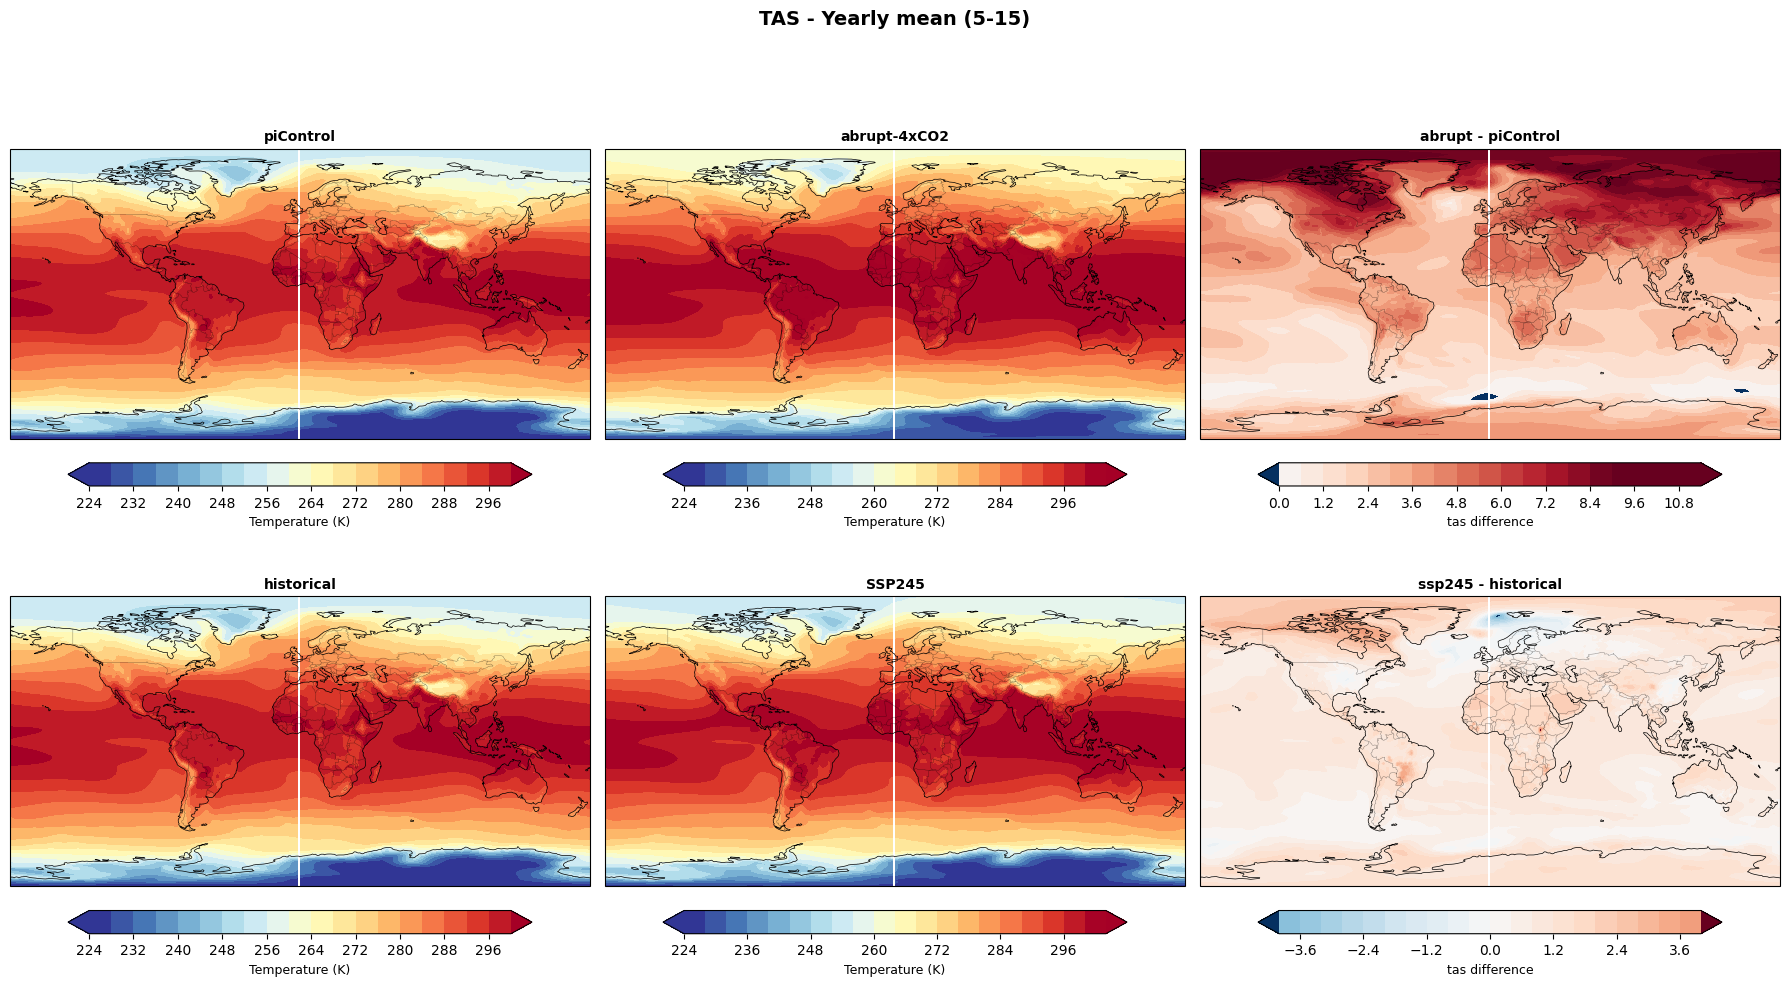

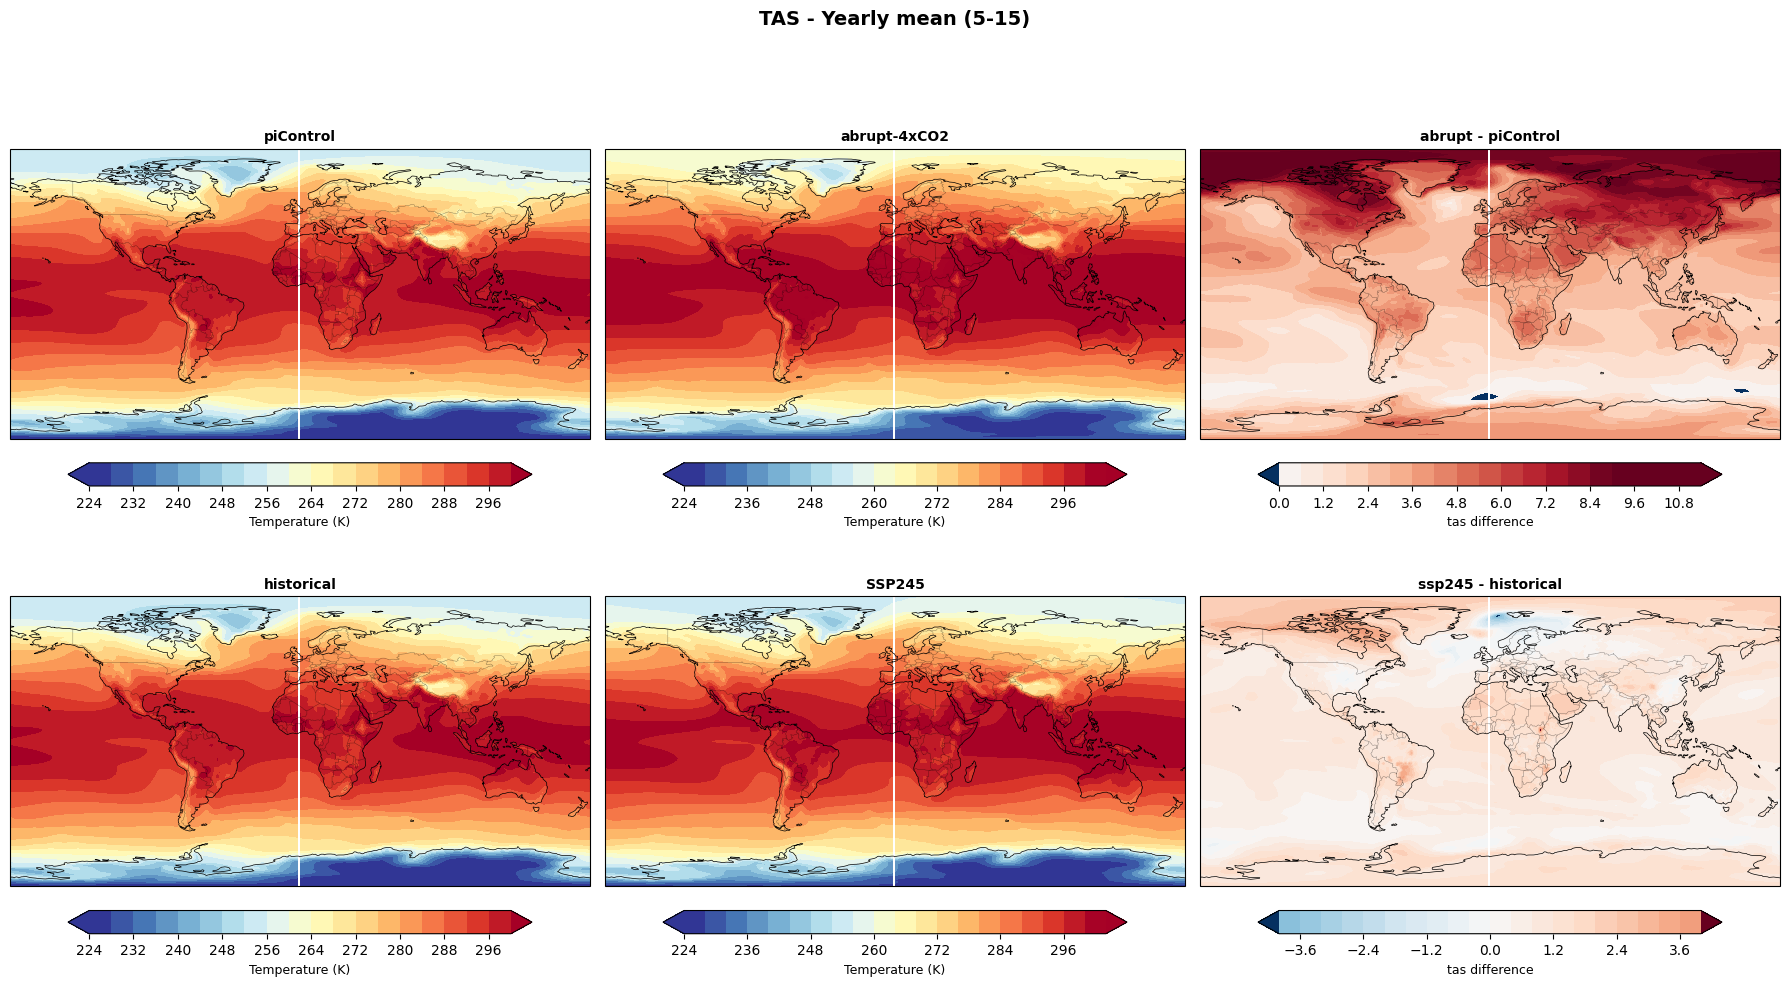

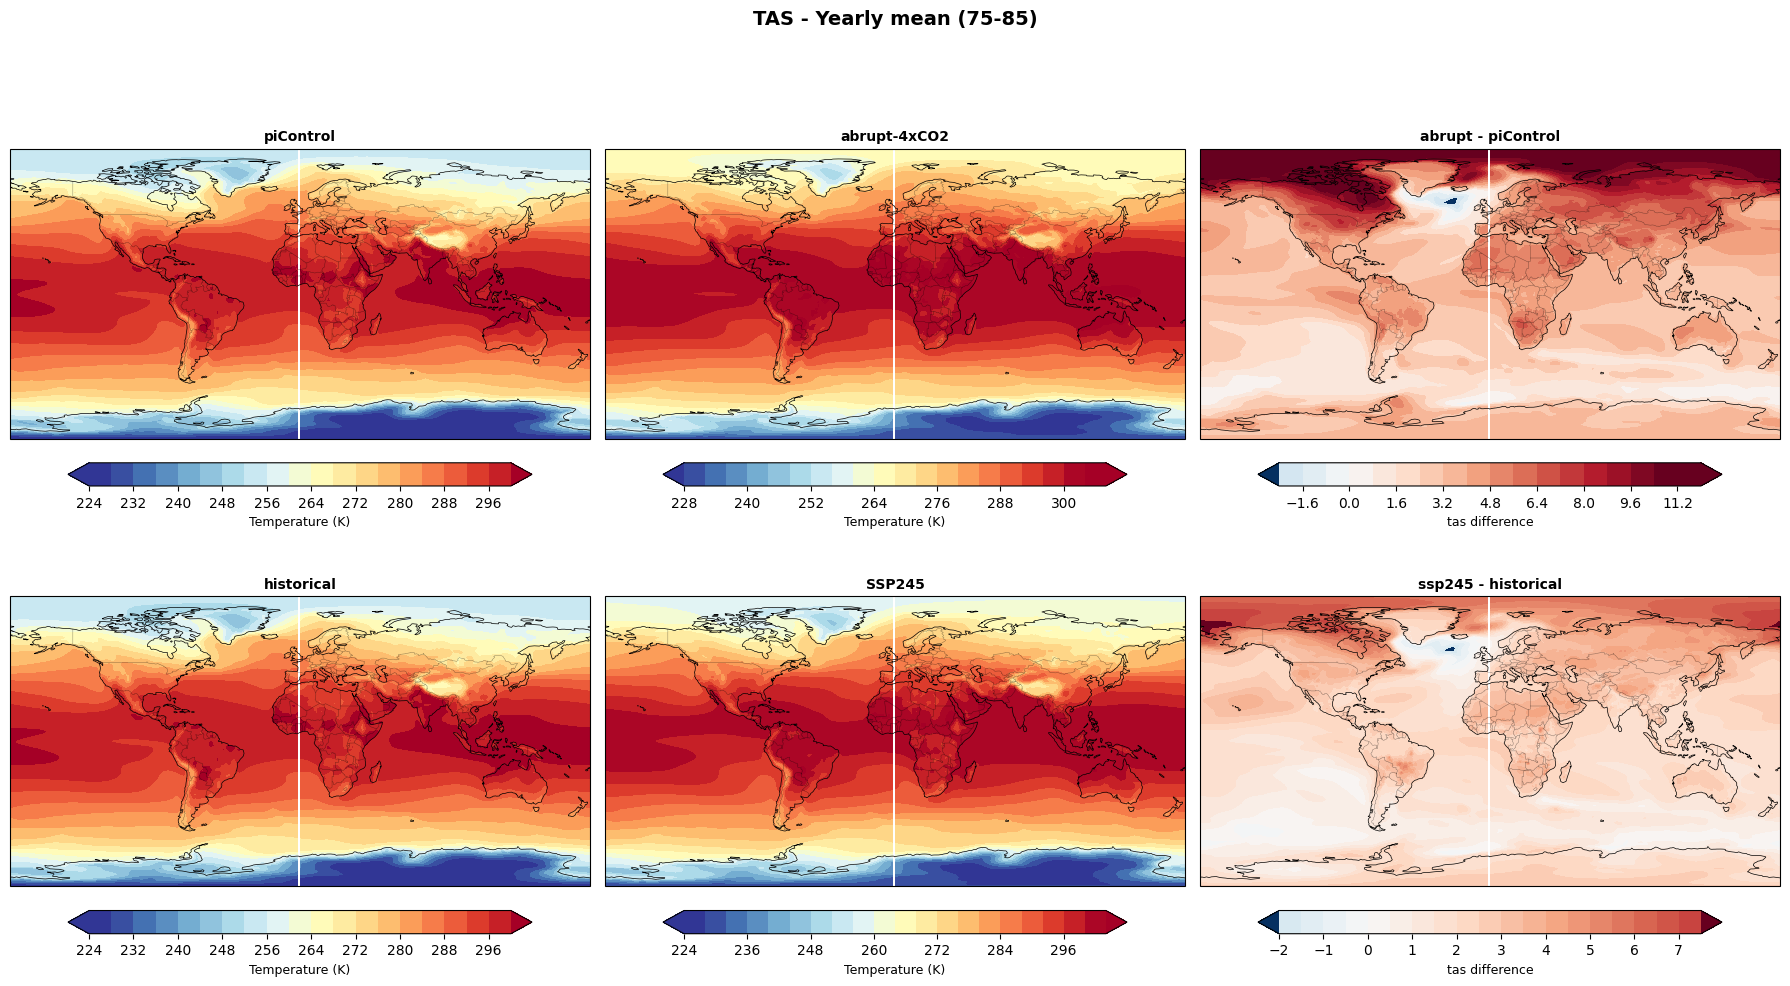

In [12]:
# Example 1: Yearly mean temperature map
var = 'tas'
mon_data = list(cache_dir.glob(f'*{var}_monthly*'))
year_data = list(cache_dir.glob(f'*{var}_yearly*'))


quick_map_plot(
    mon_data, 
    year_data, 
    var=var, 
    cbar_label='Temperature (K)',
    temporal_agg='yearly',
    year=10,
    period_years=10,
    scaling_factor=1.0,
    cmap='RdYlBu_r'
)

quick_map_plot(
    mon_data, 
    year_data, 
    var=var, 
    cbar_label='Temperature (K)',
    temporal_agg='yearly',
    year=80,
    period_years=10,
    scaling_factor=1.0,
    cmap='RdYlBu_r'
)



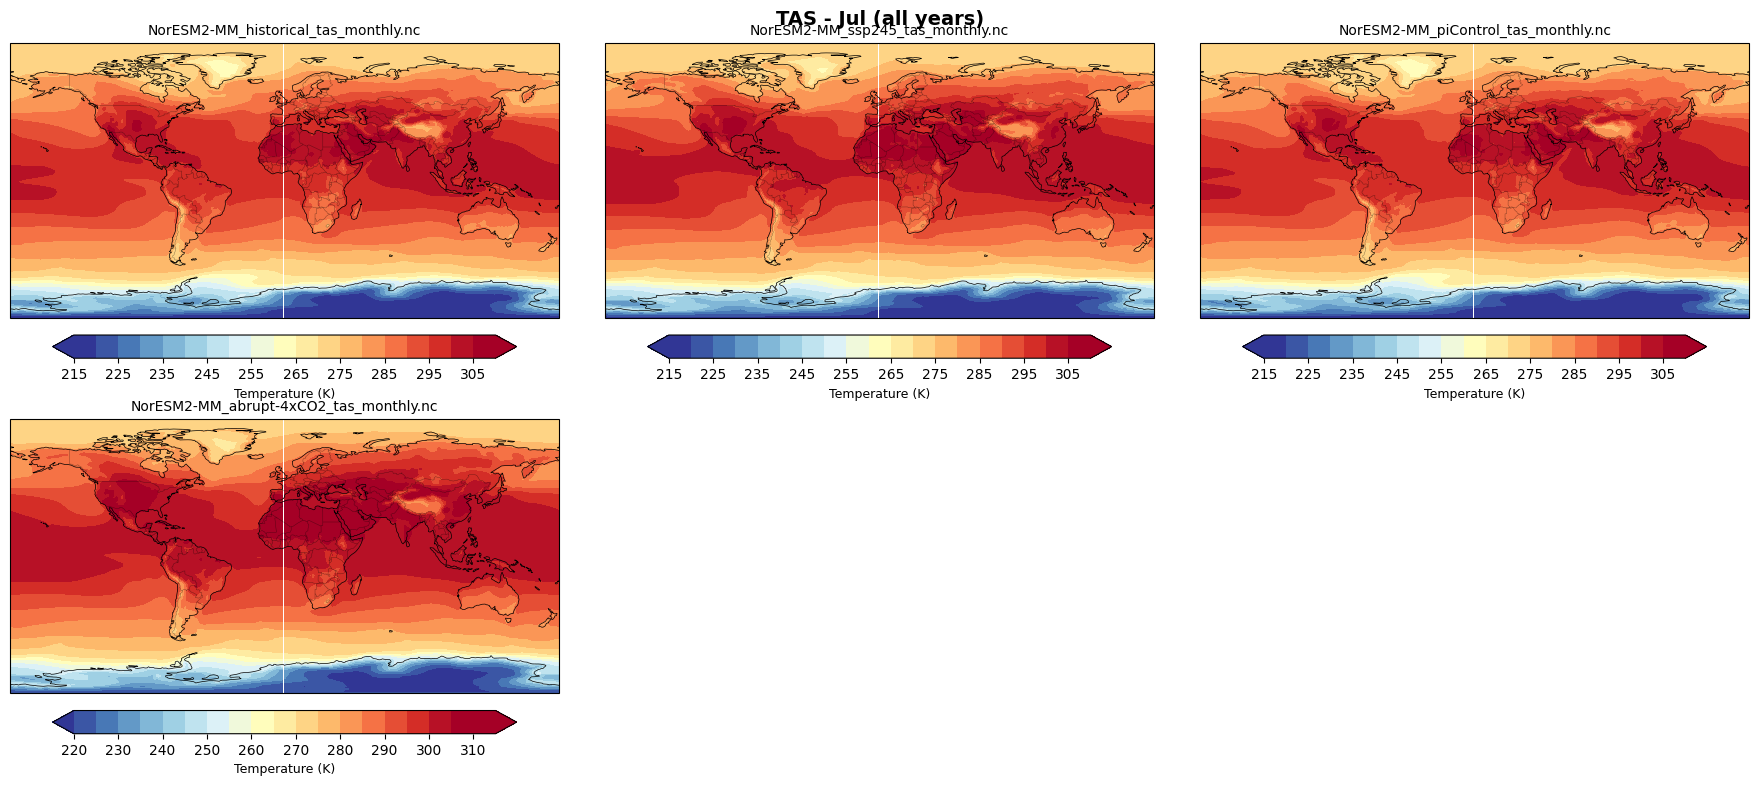

In [102]:
# Example 2: July temperature spatial pattern
var = 'tas'
mon_data = list(cache_dir.glob(f'*{var}_monthly*'))
year_data = list(cache_dir.glob(f'*{var}_yearly*'))

quick_map_plot(
    mon_data, 
    year_data, 
    var=var, 
    cbar_label='Temperature (K)',
    temporal_agg='monthly',
    month=7,  # July
    scaling_factor=1.0,
    cmap='RdYlBu_r',
    figsize=(18, 8)
)

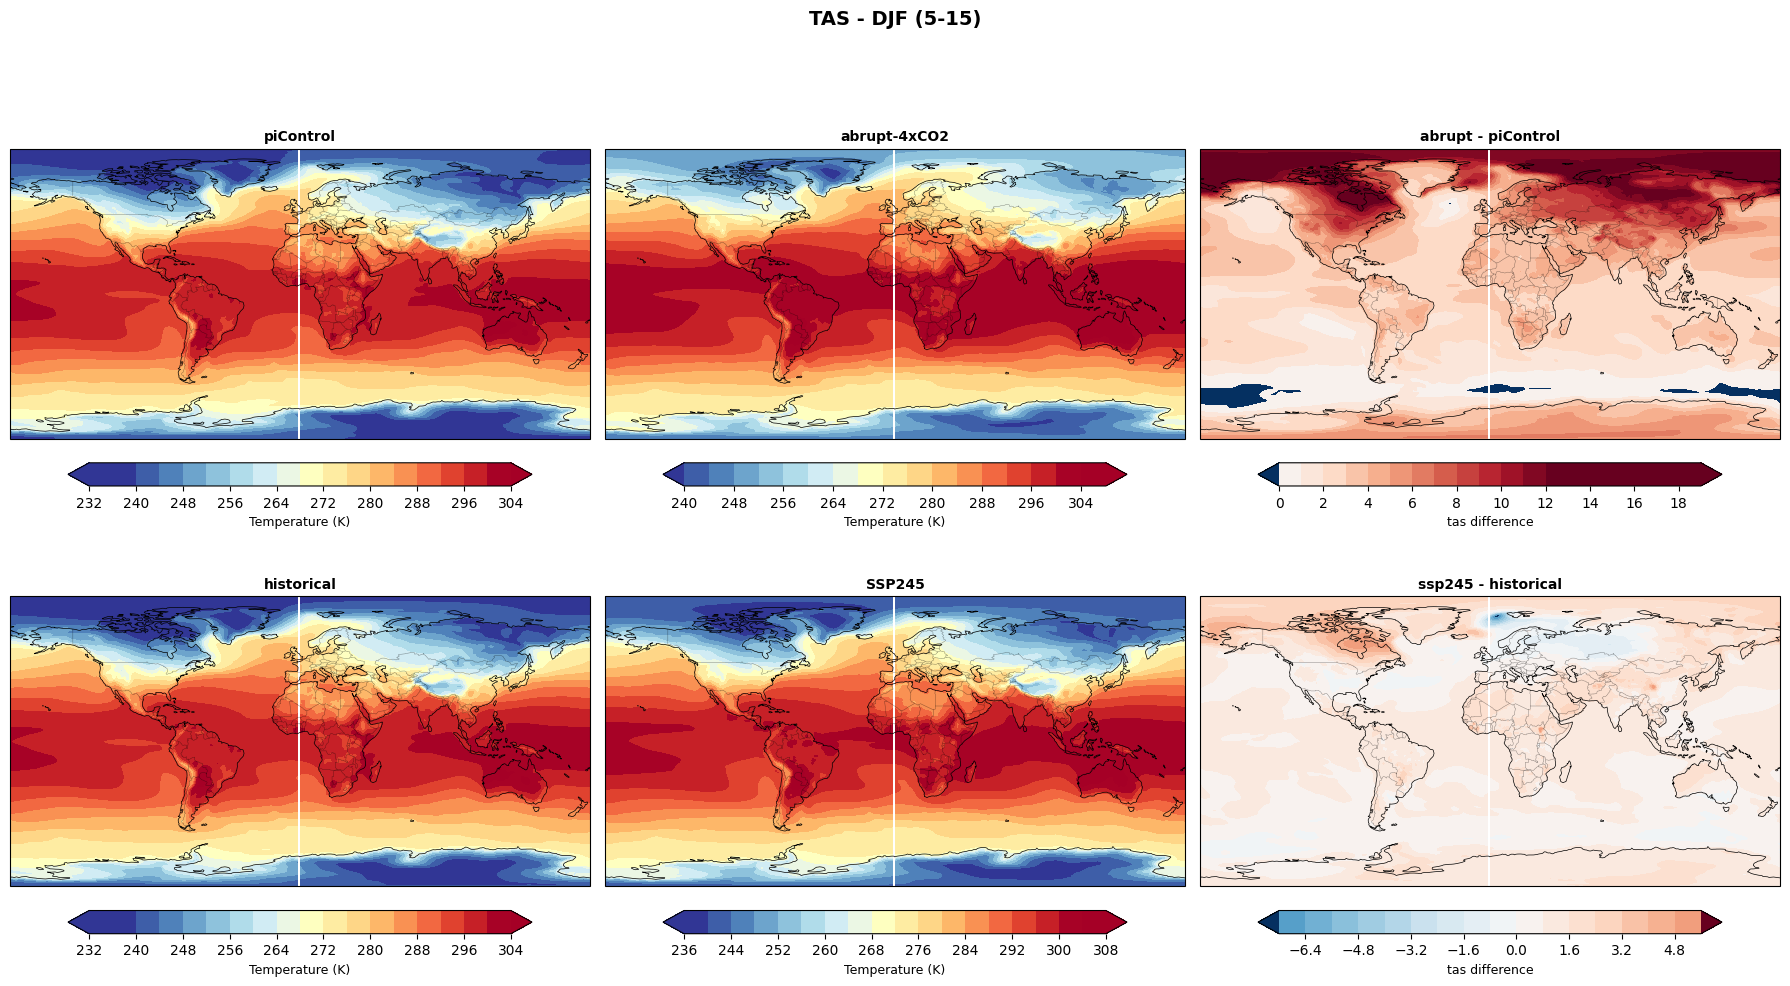

In [ ]:
# Example 3: Winter (DJF) seasonal pattern
var = 'tas'
mon_data = list(cache_dir.glob(f'*{var}_monthly*'))
year_data = list(cache_dir.glob(f'*{var}_yearly*'))

quick_map_plot(
    mon_data, 
    year_data, 
    var=var, 
    cbar_label='Temperature (K)',
    temporal_agg='seasonal',
    season='DJF',  # December-January-February
    year=10,
    period_years=10,
    scaling_factor=1.0,
    cmap='RdYlBu_r'
)
quick_map_plot(
    mon_data, 
    year_data, 
    var=var, 
    cbar_label='Temperature (K)',
    temporal_agg='seasonal',
    season='DJF',  # December-January-February
    year=100,
    period_years=10,
    scaling_factor=1.0,
    cmap='RdYlBu_r'
)

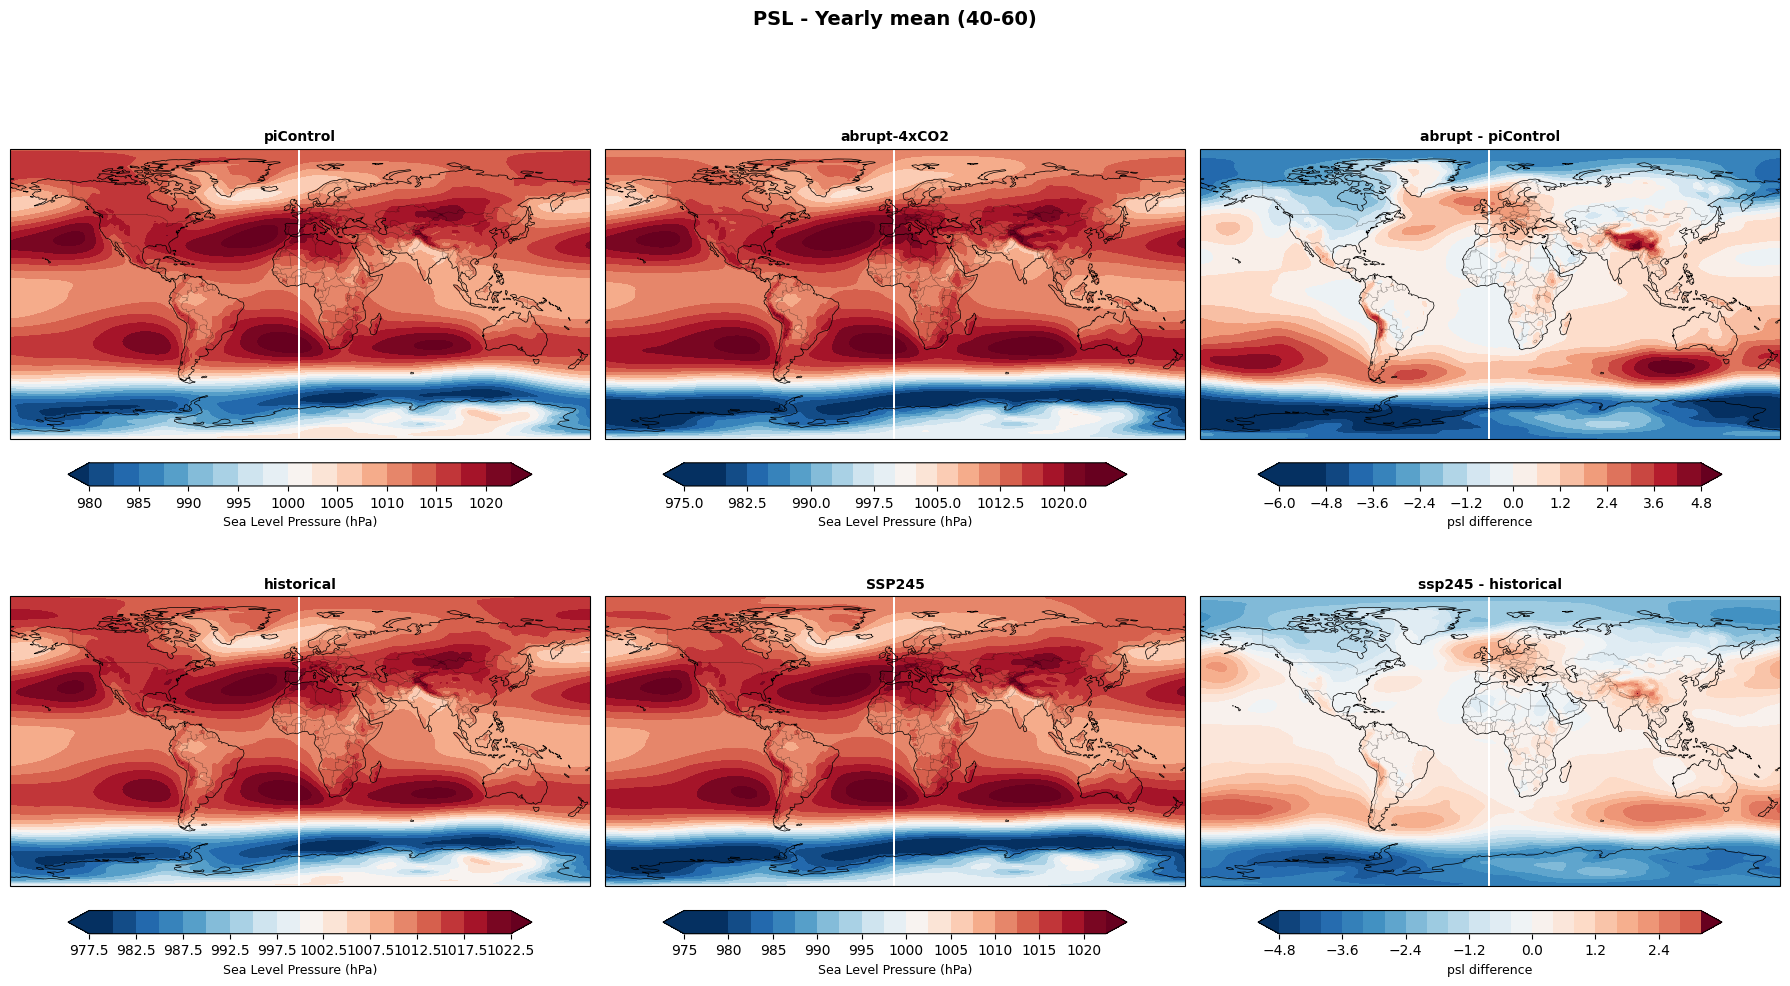

In [115]:
# Example 4: Sea level pressure - yearly mean
psl_mon_data = list(cache_dir.glob('*psl_monthly*'))
psl_year_data = list(cache_dir.glob('*psl_yearly*'))

quick_map_plot(
    psl_mon_data, 
    psl_year_data, 
    var='psl', 
    cbar_label='Sea Level Pressure (hPa)',
    temporal_agg='yearly',
    year=50,
    period_years=20,
    scaling_factor=1e-2,  # Convert Pa to hPa
    cmap='RdBu_r'
)

In [ ]:
# Example 5: Summer (JJA) precipitation with Robinson projection
var = 'pr'
mon_data = list(cache_dir.glob(f'*{var}_monthly*'))
year_data = list(cache_dir.glob(f'*{var}_yearly*'))

if mon_data and year_data:  # Only run if we have pr data
    quick_map_plot(
        mon_data, 
        year_data, 
        var=var, 
        cbar_label='Precipitation (mm/day)',
        temporal_agg='seasonal',
        season='JJA',
        year=40,
        period_years=10,
        scaling_factor=1.0,
        cmap='BrBG',
        projection=ccrs.Robinson()
    )

In [ ]:
# Example 6: January temperature with custom color scale and orthographic projection
var = 'tas'
mon_data = list(cache_dir.glob(f'*{var}_monthly*'))
year_data = list(cache_dir.glob(f'*{var}_yearly*'))

quick_map_plot(
    mon_data, 
    year_data, 
    var=var, 
    cbar_label='Temperature (K)',
    temporal_agg='monthly',
    month=1,  # January
    scaling_factor=1.0,
    cmap='coolwarm',
    vmin=220,  # Custom min (around -53°C)
    vmax=305,  # Custom max (around 32°C)
    projection=ccrs.Orthographic(0, 90),  # North Pole view
    figsize=(15, 10)
)